# Concrete Strength Prediction

## Problem Statement

- Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

- This dataset comprises common ingredients used to make concrete such as : 
  cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
  
- The objective is to predict the concrete strength using the ingredients mentioned above.

- Prediction results tells the manufacturer to optimal way to get the maximum compressive strength for a unit block of concrete using the ingredients.

## Data Collection

- The dataset is collected from UCI REPOSITORY - [CLICK HERE](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength).

- The data consists of 9 columns and 1030 rows.

## Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
import scipy.stats as stats

In [5]:
warnings.filterwarnings('ignore')

## 1. EXPLORING THE DATA

In [6]:
df = pd.read_csv('Data/Concrete_Data.csv')

In [7]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.shape

(1030, 9)

In [9]:
print(f'Number of Rows in the dataset: {df.shape[0]}')
print(f'Number of Columns in the dataset: {df.shape[1]}')

Number of Rows in the dataset: 1030
Number of Columns in the dataset: 9


In [10]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### Features
The Features from this dataset:
- **Cement** - It is the major factor that influences the strength and durability of concrete.

- **Furnace Slag** - It is a supplementary material that enhances the strength and durability of concrete and improves its resistance to chemical attack.

- **Fly Ash** - It's a byproduct of coal combustion, used to reduce the carbon footprint.

- **Water** - It is essential to initiate the chemical reaction between cement and other components, but it's excessive and inadequate amount can adversely affect the strength and durability of concrete. 

- **Superplaticizer** - Superplaticizers are chemical additives that can significantly improve the strength and workability of concrete by reducing its water-cement ratio without compromising its fluidity.

- **Coarse Aggregate** - Coarse aggregates in concrete provide mechanical strength, increases the durability, and reduces the cost by reducing the cement content and also enhancing its resistance to compressive and tensile forces.

- **Fine Aggregate** - Fine aggregate in concrete fills the voids between coarse aggregate particles and helps to produce a workable mix, resulting in a smoother surface finish and improved strength.

- **Age** - Age is an important factor in determining the strength of concrete as it affects the chemical reaction between cement and water, resulting in gradual strength gain over time.

### Renaming columns

In [11]:
col_dict = {
 'Age (day)': "Age",
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': "Furnace_Slag",
 'Cement (component 1)(kg in a m^3 mixture)': "Cement",
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': "Coarse_Aggregate",
 'Concrete compressive strength(MPa, megapascals) ': "Compressive_Strength",
 'Fine Aggregate (component 7)(kg in a m^3 mixture)': "Fine_Aggregate",
 'Fly Ash (component 3)(kg in a m^3 mixture)': "Fly_Ash",
 'Superplasticizer (component 5)(kg in a m^3 mixture)': "Superplasticizer",
 'Water  (component 4)(kg in a m^3 mixture)':"Water"
}

df.rename(columns=col_dict, inplace=True)

In [12]:
df.head()

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
df.dtypes

Cement                  float64
Furnace_Slag            float64
Fly_Ash                 float64
Water                   float64
Superplasticizer        float64
Coarse_Aggregate        float64
Fine_Aggregate          float64
Age                       int64
Compressive_Strength    float64
dtype: object

**Few Insights**:

1. All the features, except Age are decimal numbers (float64).
2. Age is an integer (int64).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Furnace_Slag          1030 non-null   float64
 2   Fly_Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse_Aggregate      1030 non-null   float64
 6   Fine_Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Few Insights**:

1. All the features contains same number of rows, which means we don't have any nan values in the dataset, but that doesn't mean we don't have any missing values, nan values could be disguised as 0 or negative or any very high value. Further investigation needs to be done.

## 2. ANALYZING THE DATASET

### Read top 10 rows

In [15]:
df.head(10)

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### Last 10 rows

In [16]:
df.tail(10)

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.88
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [17]:
df.sample(5, random_state=54)

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
555,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,28,27.94
469,194.7,0.0,100.5,170.2,7.5,998.0,901.8,100,44.28
957,143.0,169.4,142.7,190.7,8.4,967.4,643.5,28,29.73
779,295.0,0.0,0.0,185.0,0.0,1069.0,769.0,28,25.18
44,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54


### Descriptive Statistics

In [18]:
df.describe()

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Are mean and median values similar?

In [19]:
def descriptive_statistics(df):
    """
    results: mean, median and difference between them.
    Higher the difference, more likely to have outliers in that feature.
    """
    desc_stats = df.describe().T
    desc_stats["mean_median_diff"] = desc_stats['mean'] - desc_stats['50%']
    return desc_stats[['mean','50%','mean_median_diff']].sort_values(by='mean_median_diff', ascending=False)

In [20]:
descriptive_statistics(df)

,mean,50%,mean_median_diff
Fly_Ash,54.188350,0.000,54.188350
Furnace_Slag,73.895825,22.000,51.895825
Age,45.662136,28.000,17.662136
Cement,281.167864,272.900,8.267864
Coarse_Aggregate,972.918932,968.000,4.918932
Compressive_Strength,35.817961,34.445,1.372961
Superplasticizer,6.204660,6.400,-0.195340
Water,181.567282,185.000,-3.432718
Fine_Aggregate,773.580485,779.500,-5.919515


**Few Insights**:

1. Furnace_Slag, Fly_Ash and Age has high difference in mean and median, which means these three columns may have outliers. Box plot would reveal more details about it.

2. Water and Superplasticizer has negligible difference in mean and median, so, mean and median can be used interchangeably for these features.

3. Remaining features have slight difference, further analysis will provide more information about these features.

In [21]:
def describe_numeric(df, col_name):
    min_value = df[col_name].min()
    max_value = df[col_name].max()
    print(f"\nCOLUMN: {col_name}")
    print(f"Minimum: {min_value}")
    print(f"Maximum: {max_value}")
    print(f"Average: {round(df[col_name].mean(),3)}")
    print(f"Standard Deviation: {round(df[col_name].std(),3)}")
    print(f"Median: {df[col_name].median()}")

In [22]:
describe_numeric(df, 'Cement')


COLUMN: Cement
Minimum: 102.0
Maximum: 540.0
Average: 281.168
Standard Deviation: 104.506
Median: 272.9


In [23]:
for col_name in df.columns:
    describe_numeric(df, col_name)


COLUMN: Cement
Minimum: 102.0
Maximum: 540.0
Average: 281.168
Standard Deviation: 104.506
Median: 272.9

COLUMN: Furnace_Slag
Minimum: 0.0
Maximum: 359.4
Average: 73.896
Standard Deviation: 86.279
Median: 22.0

COLUMN: Fly_Ash
Minimum: 0.0
Maximum: 200.1
Average: 54.188
Standard Deviation: 63.997
Median: 0.0

COLUMN: Water
Minimum: 121.8
Maximum: 247.0
Average: 181.567
Standard Deviation: 21.354
Median: 185.0

COLUMN: Superplasticizer
Minimum: 0.0
Maximum: 32.2
Average: 6.205
Standard Deviation: 5.974
Median: 6.4

COLUMN: Coarse_Aggregate
Minimum: 801.0
Maximum: 1145.0
Average: 972.919
Standard Deviation: 77.754
Median: 968.0

COLUMN: Fine_Aggregate
Minimum: 594.0
Maximum: 992.6
Average: 773.58
Standard Deviation: 80.176
Median: 779.5

COLUMN: Age
Minimum: 1
Maximum: 365
Average: 45.662
Standard Deviation: 63.17
Median: 28.0

COLUMN: Compressive_Strength
Minimum: 2.33
Maximum: 82.6
Average: 35.818
Standard Deviation: 16.706
Median: 34.445


### Missing Values

In [39]:
def missing_values_columns(data, plotting=True):
    
    # Total number of missing values per column
    null_values = data.isna().sum().sort_values(ascending=False)
    
    # mean of missing values per column
    null_counts = data.isna().mean().sort_values(ascending=False)
    
    # percentage of missing values per column
    percentage_of_null_values = round(null_counts*100, 3)
    
    # Creating a dataframe with number of missing values and its percentage
    missing_values = pd.DataFrame({"Null_Values":null_values,
                                 "% of Null Values": percentage_of_null_values})
    
    # plotting missing values
    if plotting:
        n_columns = len(data.columns)
        column_width = 1
        aspect_ratio = 1.5
        fig_width = n_columns * column_width
        fig_height = fig_width / aspect_ratio
        fig, ax = plt.subplots(figsize=(fig_width+3, fig_height+3))
        
        ax.bar(np.arange(len(null_counts)), percentage_of_null_values)
        ax.set_xticks(np.arange(len(null_counts)), 
                      null_counts.index, 
                      rotation='45')
        ax.set_xlabel('Features')
        ax.set_ylabel('% of missing data')
        ax.set_title('Missing Values Distribution')
        
        # Add values on the top of the bar
        for i, v in enumerate(percentage_of_null_values):
            if v == 0:
                None
            else:
                plt.text(i, v+0.1, str(round(v,1))+' %', ha='center', va='bottom')
    
    return missing_values

,Null_Values,% of Null Values
Cement,0,0.0
Furnace_Slag,0,0.0
Fly_Ash,0,0.0
Water,0,0.0
Superplasticizer,0,0.0
Coarse_Aggregate,0,0.0
Fine_Aggregate,0,0.0
Age,0,0.0
Compressive_Strength,0,0.0


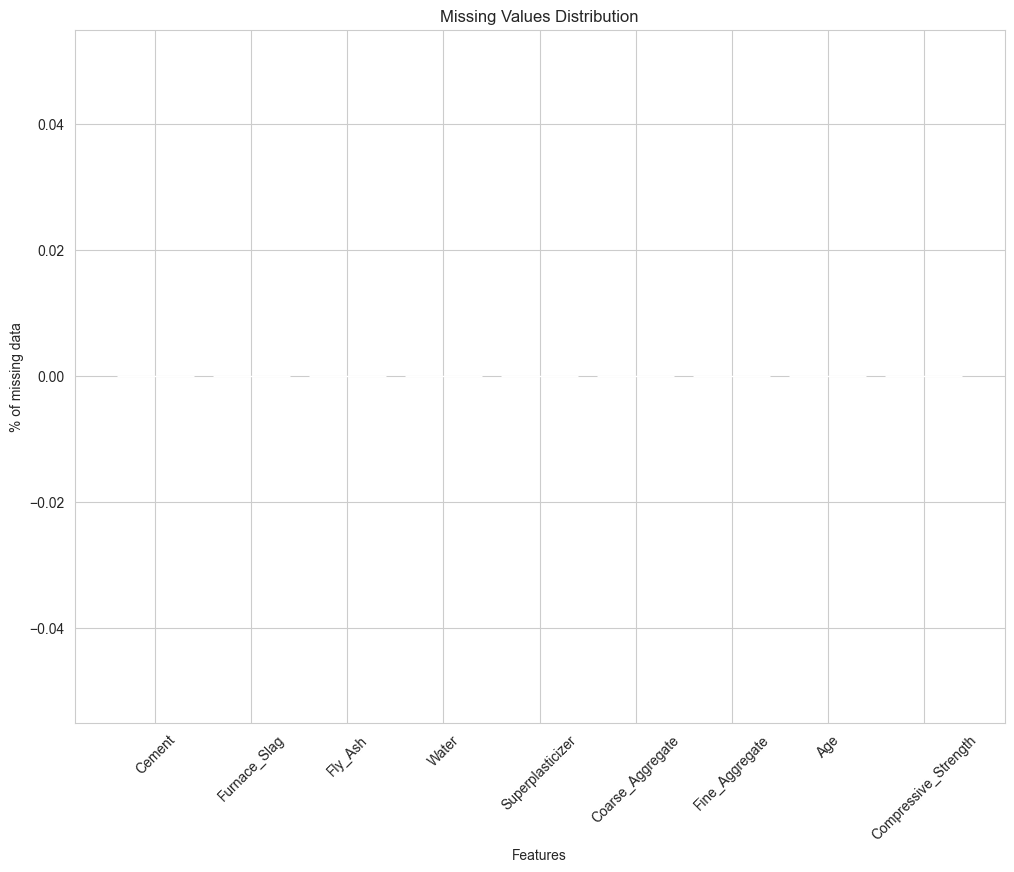

In [40]:
missing_values_columns(df)

## 3. UNIVARIATE ANALYSIS

### Distribution of features

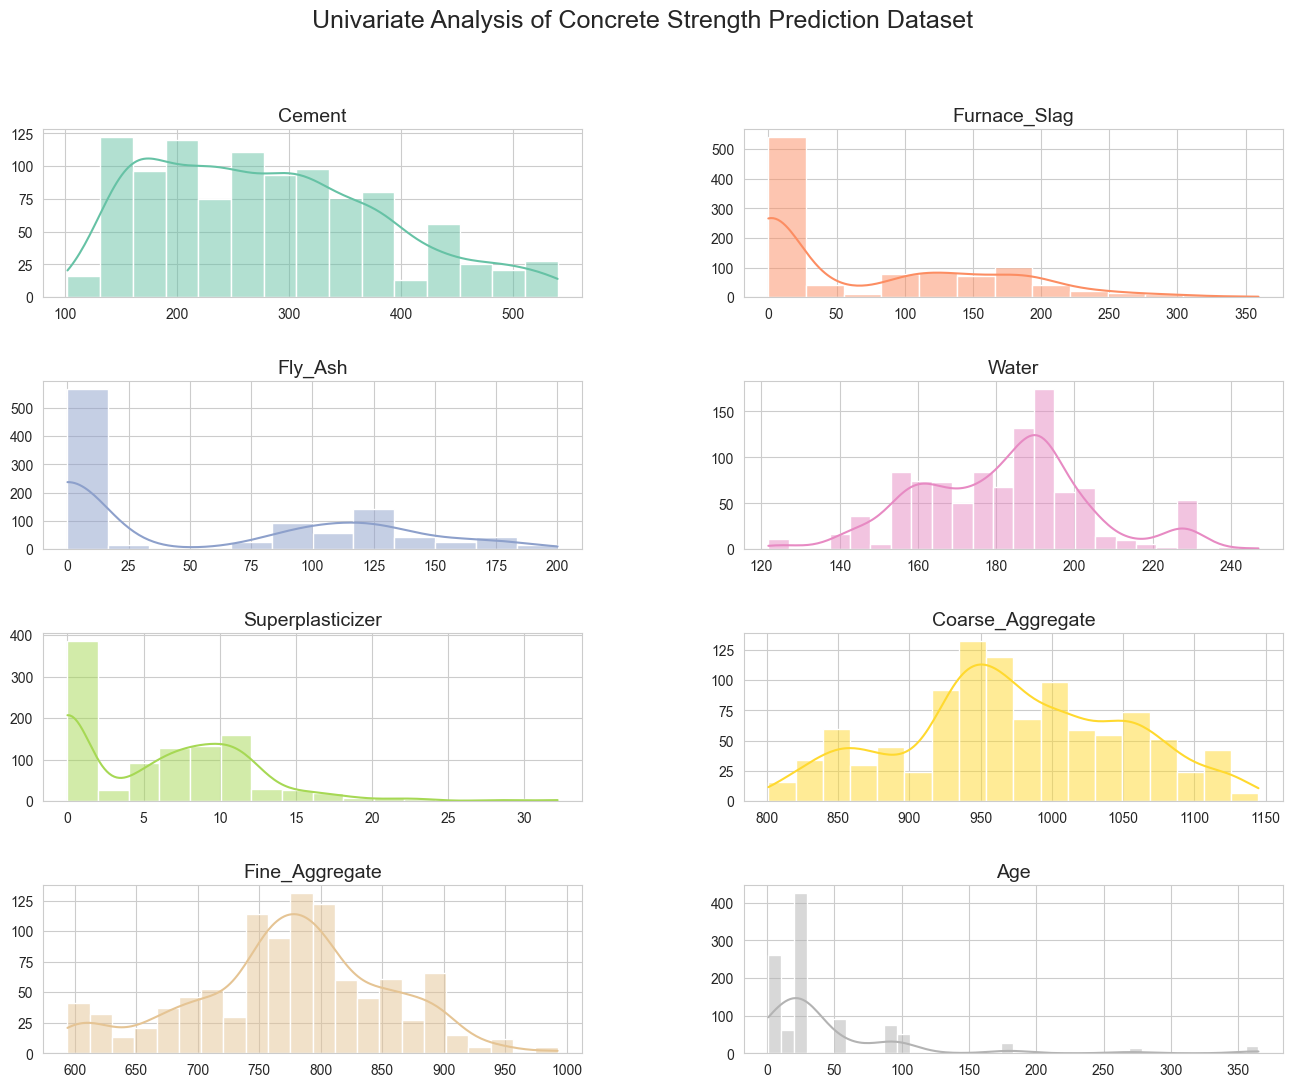

In [34]:
# set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('Set2')

# create a figure and axes object
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(16, 12))
axes = axes.flatten()

# create a histogram for each feature
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, kde=True, color=sns.color_palette()[i], ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_title(column, fontsize=14)

# adjust the spacing and layout of the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Univariate Analysis of Concrete Strength Prediction Dataset', fontsize=18)

# display the plot
plt.show()

### Boxen plot

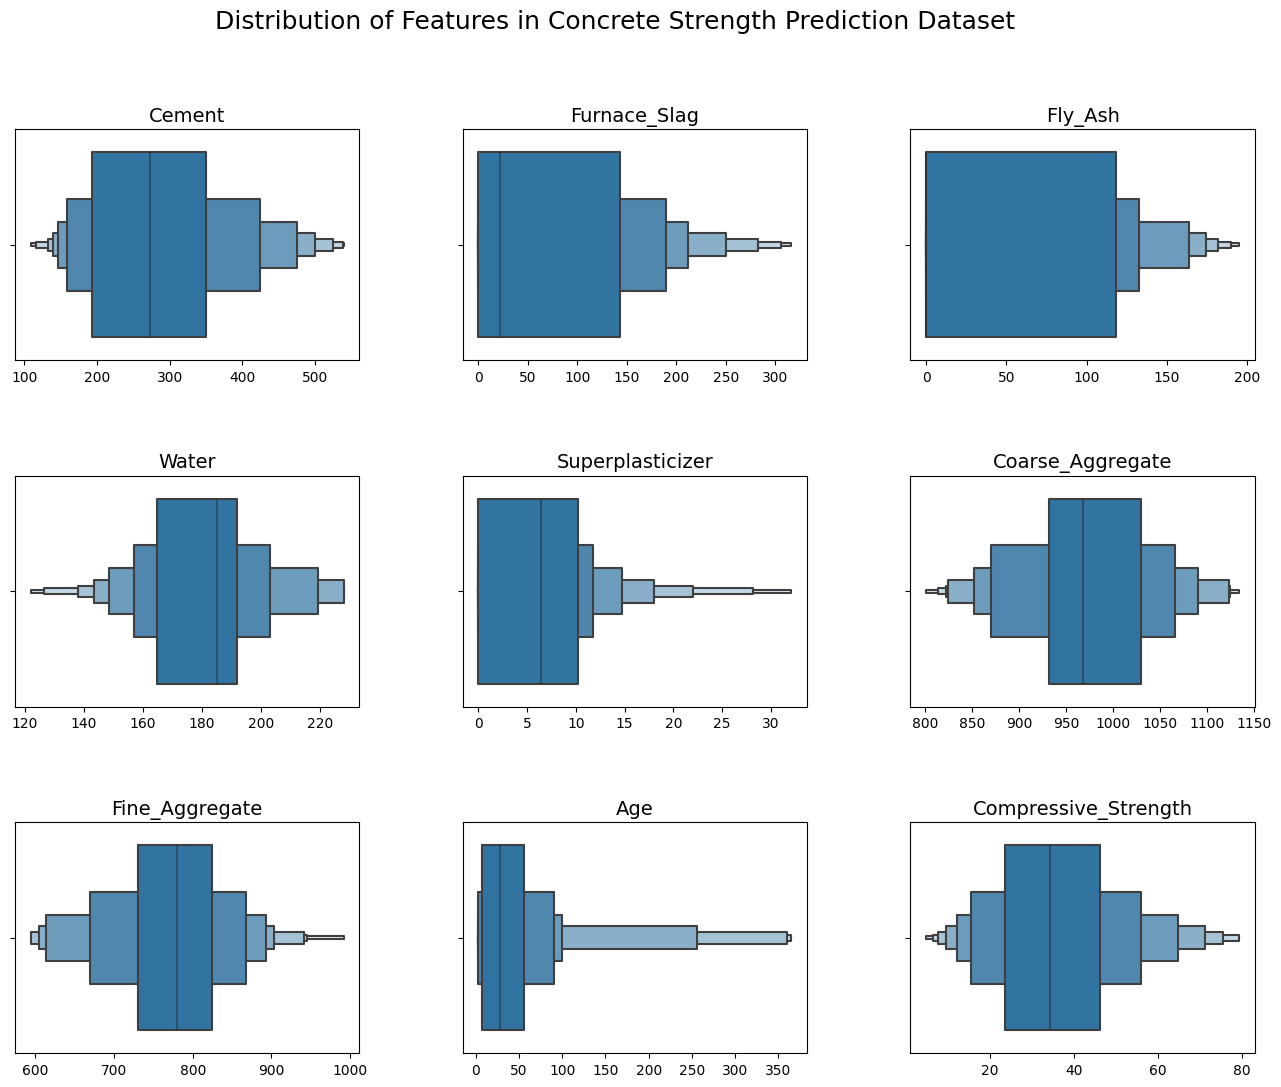

In [29]:
# create a figure and axes object
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 12))
axes = axes.flatten()

# create a boxen plot for each feature
for i, column in enumerate(df.columns):
    sns.boxenplot(x=column, data=df, linewidth=1.5, scale='exponential', showfliers=False, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_title(column, fontsize=14)

# adjust the spacing and layout of the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Distribution of Features in Concrete Strength Prediction Dataset', fontsize=18)

# display the plot
plt.show()

**Few Insights:**

- Cement mostly lie between 180 to 350
- Furnace Slag values mostly are between 0 to 140
- Fly Ash mostly between 0 to 120
- Superplaticizer mostly between 0 to 10
- Age contains quite a lot outliers, it's highly right skewed.

## Hexbin

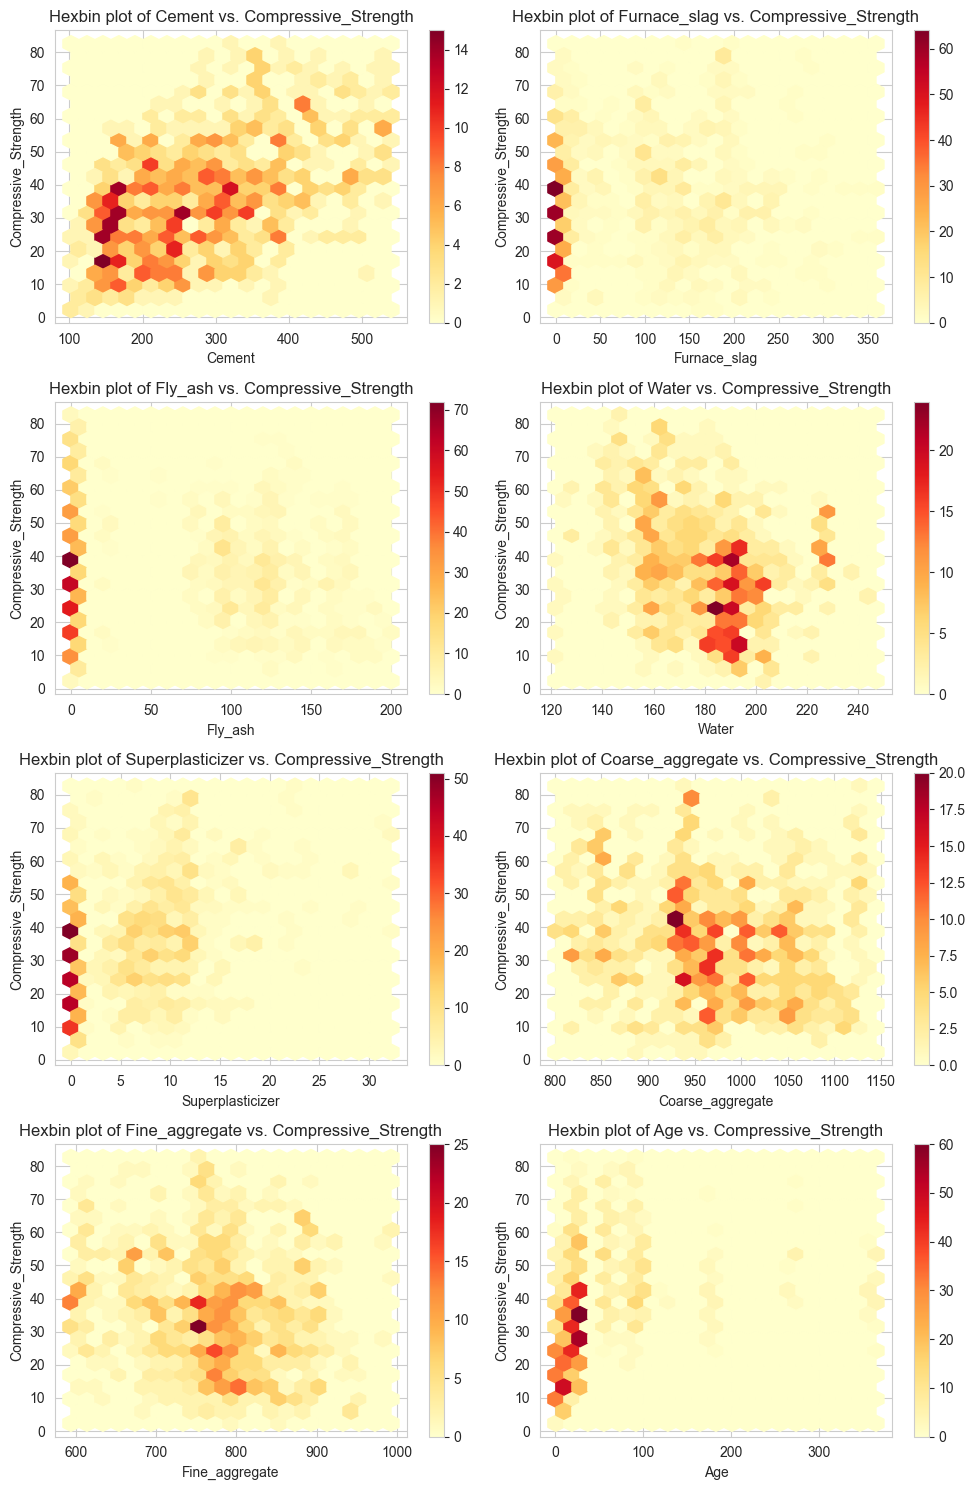

In [60]:
# Create a figure object and subplots for each feature
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(10,15))

# Loop through each feature and create a hexbin plot
for idx, feature in enumerate(df.columns[:-1]):
    row = idx // 2
    col = idx % 2
    hb = axs[row, col].hexbin(x=df[feature], y=df["Compressive_Strength"], cmap="YlOrRd", gridsize=20)
    axs[row, col].set_title(f"Hexbin plot of {feature.capitalize()} vs. Compressive_Strength")
    axs[row, col].set_xlabel(feature.capitalize())
    axs[row, col].set_ylabel("Compressive_Strength")
    fig.colorbar(hb, ax=axs[row, col])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


### Violin plot

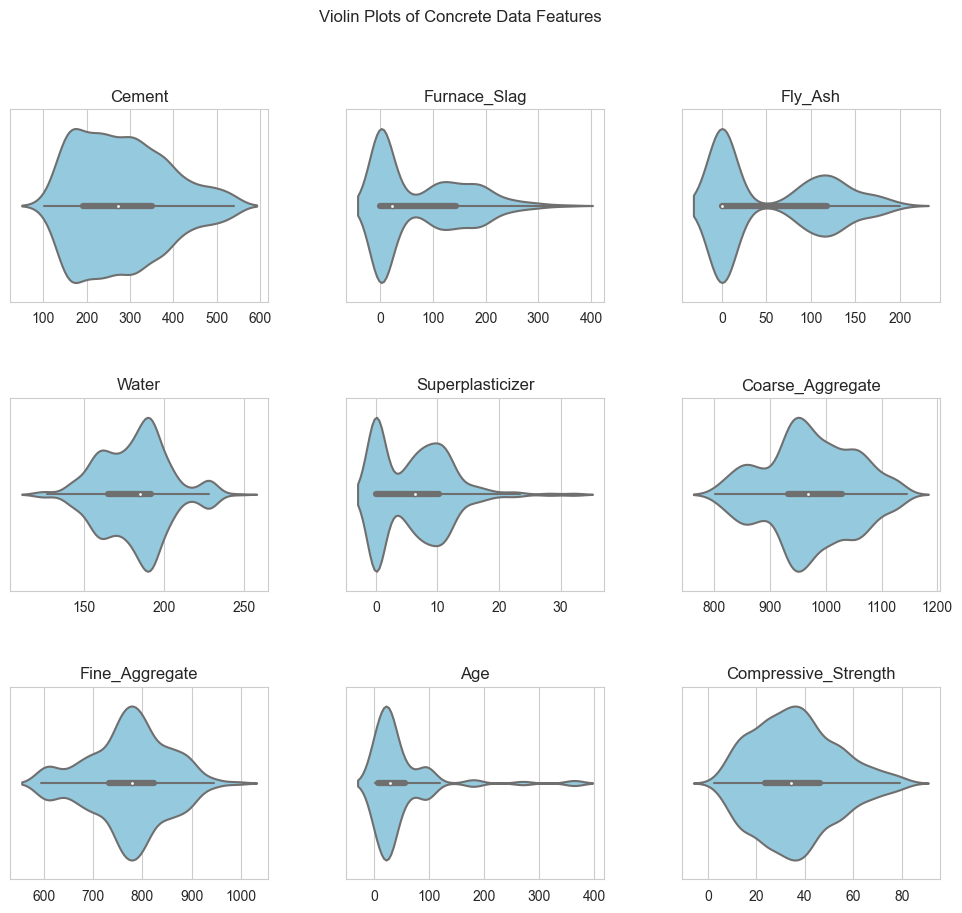

In [62]:
# Create a figure and axis objects for the bean plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Loop through each feature and create a bean plot on the corresponding axis
for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    sns.violinplot(x=feature, data=df, ax=ax, color='skyblue')
    ax.set_xlabel("")
    ax.set_title(feature)

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Set the title of the figure
fig.suptitle("Violin Plots of Concrete Data Features")

# Display the plot
plt.show()


### CDF

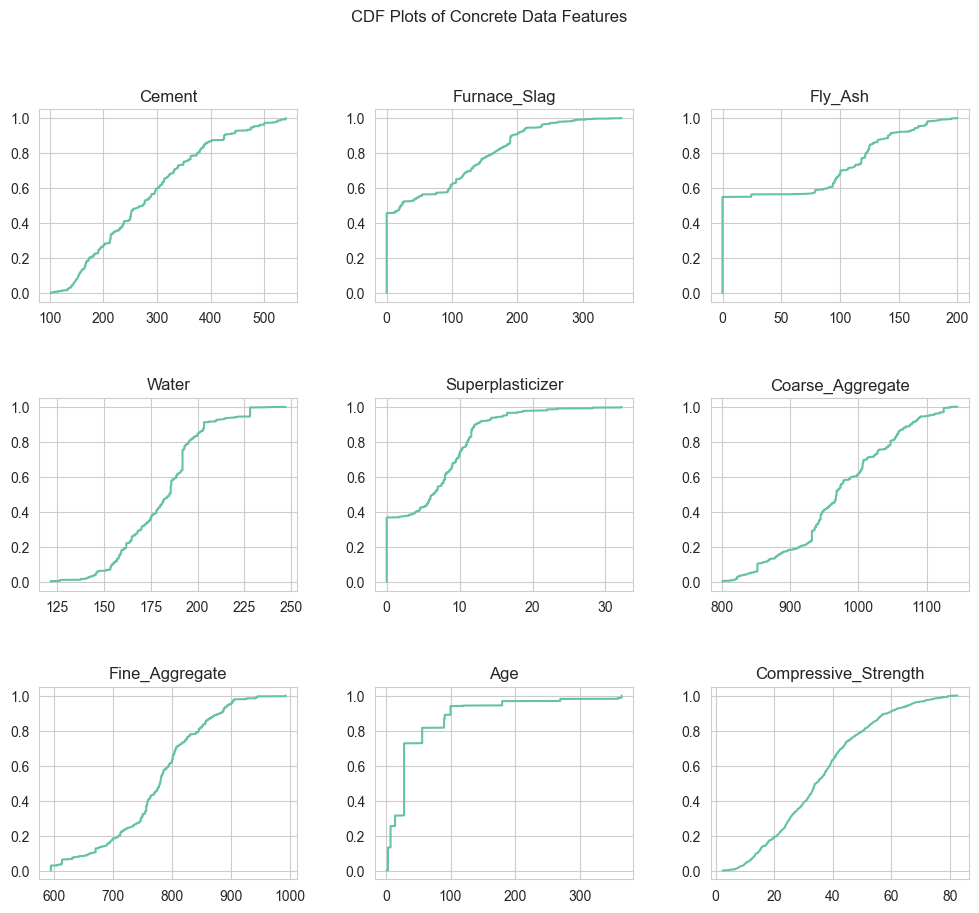

In [65]:
# Create a figure and axis objects for the CDF plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Loop through each feature and create a CDF plot on the corresponding axis
for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    sorted_data = np.sort(df[feature])
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    ax.plot(sorted_data, yvals)
    ax.set_title(feature)

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Set the title of the figure
fig.suptitle("CDF Plots of Concrete Data Features")

# Display the plot
plt.show()

## 5. BI-VARIATE ANALYSIS

### Correlation Matrix

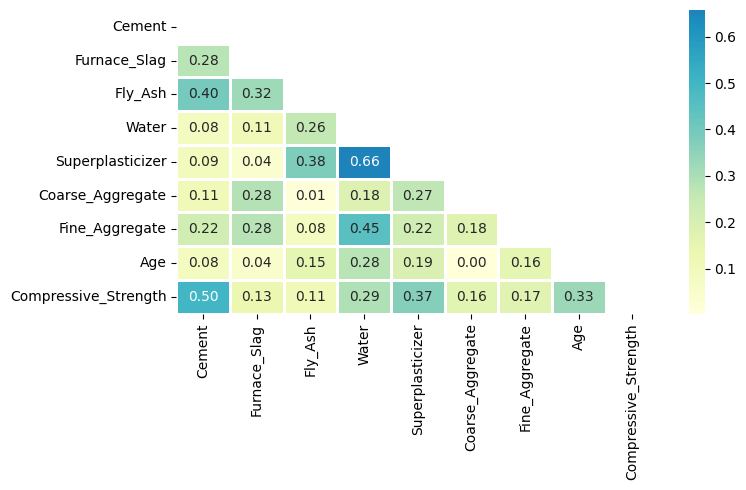

In [27]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k=-1)
mask = lower_triangle== 0

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(lower_triangle, center=0.5, 
            cmap='YlGnBu', annot=True, fmt='0.02f', 
            xticklabels=corr.index, yticklabels=corr.columns,
            mask=mask, cbar=True, linewidths=1, ax=ax)
plt.tight_layout();

## 4. DATA CLEANING

### Check Duplicates

In [21]:
df.duplicated().sum()

25

In [22]:
duplicates = df.duplicated()

df[duplicates]

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


### Drop Duplicates

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(1005, 9)

### Check Outliers

In [25]:
df.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

In [26]:
def feature_analysis_for_outliers(df, feature):
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
    fig.suptitle(feature, fontsize=25)
    
    # histogram
    sns.histplot(df[feature], ax=ax[0])
    ax[0].set_title(f'Histogram', fontsize=15)
    
    # Q-Q Plot
    stats.probplot(df[feature], dist='norm', plot=ax[1])
    ax[1].set_title(f'Q-Q Plot', fontsize=15)
    
    # Boxplot
    sns.boxplot(df[feature], ax=ax[2])
    ax[2].set_title(f'Box plot', fontsize=15)
    
    plt.tight_layout();

In [27]:
def gaussian_thresholds(df, variable):
    
    mean = df[variable].mean()
    standard_deviation = df[variable].std()
    
    lower_limit = mean - 3*standard_deviation
    upper_limit = mean + 3*standard_deviation
    
    return lower_limit, upper_limit

In [28]:
def iqr_thresholds(df, variable):
    
    # 25th percentile and 75th percentile - IQR
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_limit = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[variable].quantile(0.75) + (IQR * 1.5)
    
    return lower_limit, upper_limit

In [29]:
def Winsorization(df, variable, lower_quantile=0.05, upper_quantile=0.95):

    # the boundaries are the quantiles

    lower_limit = df[variable].quantile(lower_quantile)
    upper_limit = df[variable].quantile(upper_quantile)

    return lower_limit, upper_limit

In [30]:
def outlier_percentage(df, variable, type='IQR', lower_quantile=0.05, upper_quantile=0.95):
    
    # The lower_limit and upper_limit values comes from the 
    # find_outlier_limits function.    
    # Boolean Mask
    
    if type == 'Gaussian':
        print("Using Gaussian method for outlier detection")
        lower_limit, upper_limit = gaussian_thresholds(df, variable)
    elif type == 'IQR':
        print("Using IQR method for outlier detection")
        lower_limit, upper_limit = iqr_thresholds(df, variable)
    elif type == 'Winsorization':
        print("Using Percentiles method for outlier detection")
        lower_limit, upper_limit = Winsorization(df, variable, lower_quantile=lower_quantile, upper_quantile=upper_quantile)
    
    left_outliers = df[variable] < lower_limit
    right_outliers = df[variable] > upper_limit
    
    # Total number of the outliers
    num_outliers = len(df[variable][(left_outliers) | (right_outliers)])
    total_rows = df.shape[0]
    
    # Percentage of Outliers
    percentage = (num_outliers/ total_rows)*100
    
    print(f'The feature {variable} contains {round(percentage,3)}% of outliers.')
    print(f"The lower_limit for {variable} is {lower_limit}")
    print(f"The upper_limit for {variable} is {upper_limit}")
    
    return lower_limit, upper_limit

In [31]:
def check_capping(df, variable, lower_limit, upper_limit):

    variable_without_outliers = pd.Series(np.where(df[variable] > upper_limit, upper_limit,
             np.where(df[variable] < lower_limit, lower_limit, df[variable])))
    
    new_df = pd.DataFrame({variable:df[variable],
                          'after_capping':variable_without_outliers})
    
    plt.figure(figsize=(20,5))
    plt.suptitle(f'Before and After Capping',
                 fontsize=25,fontweight=25)

    # Before Capping Outliers
    plt.subplot(1,2,1)
    plt.title('Histogram')
    sns.histplot(new_df,bins=30,kde=True)
    
    plt.subplot(1,2,2)
    sns.boxplot(new_df)
    plt.title('Boxplot')
    
    plt.show()

In [32]:
def perform_capping(df, variable, lower_limit, upper_limit):

    df[variable] = np.where(df[variable] > upper_limit, upper_limit,
             np.where(df[variable] < lower_limit, lower_limit, df[variable]))

    return f"Outliers are replaced/ capped with lower_limit and upper_limit values in {variable}"

In [33]:
df.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

#### a. Cement

In [34]:
# feature_analysis_for_outliers(df, variable)
# outlier_percentage(df, variable)
# check_capping(df, variable, lower_limit, upper_limit)
# perform_capping(df, variable, lower_limit, upper_limit)

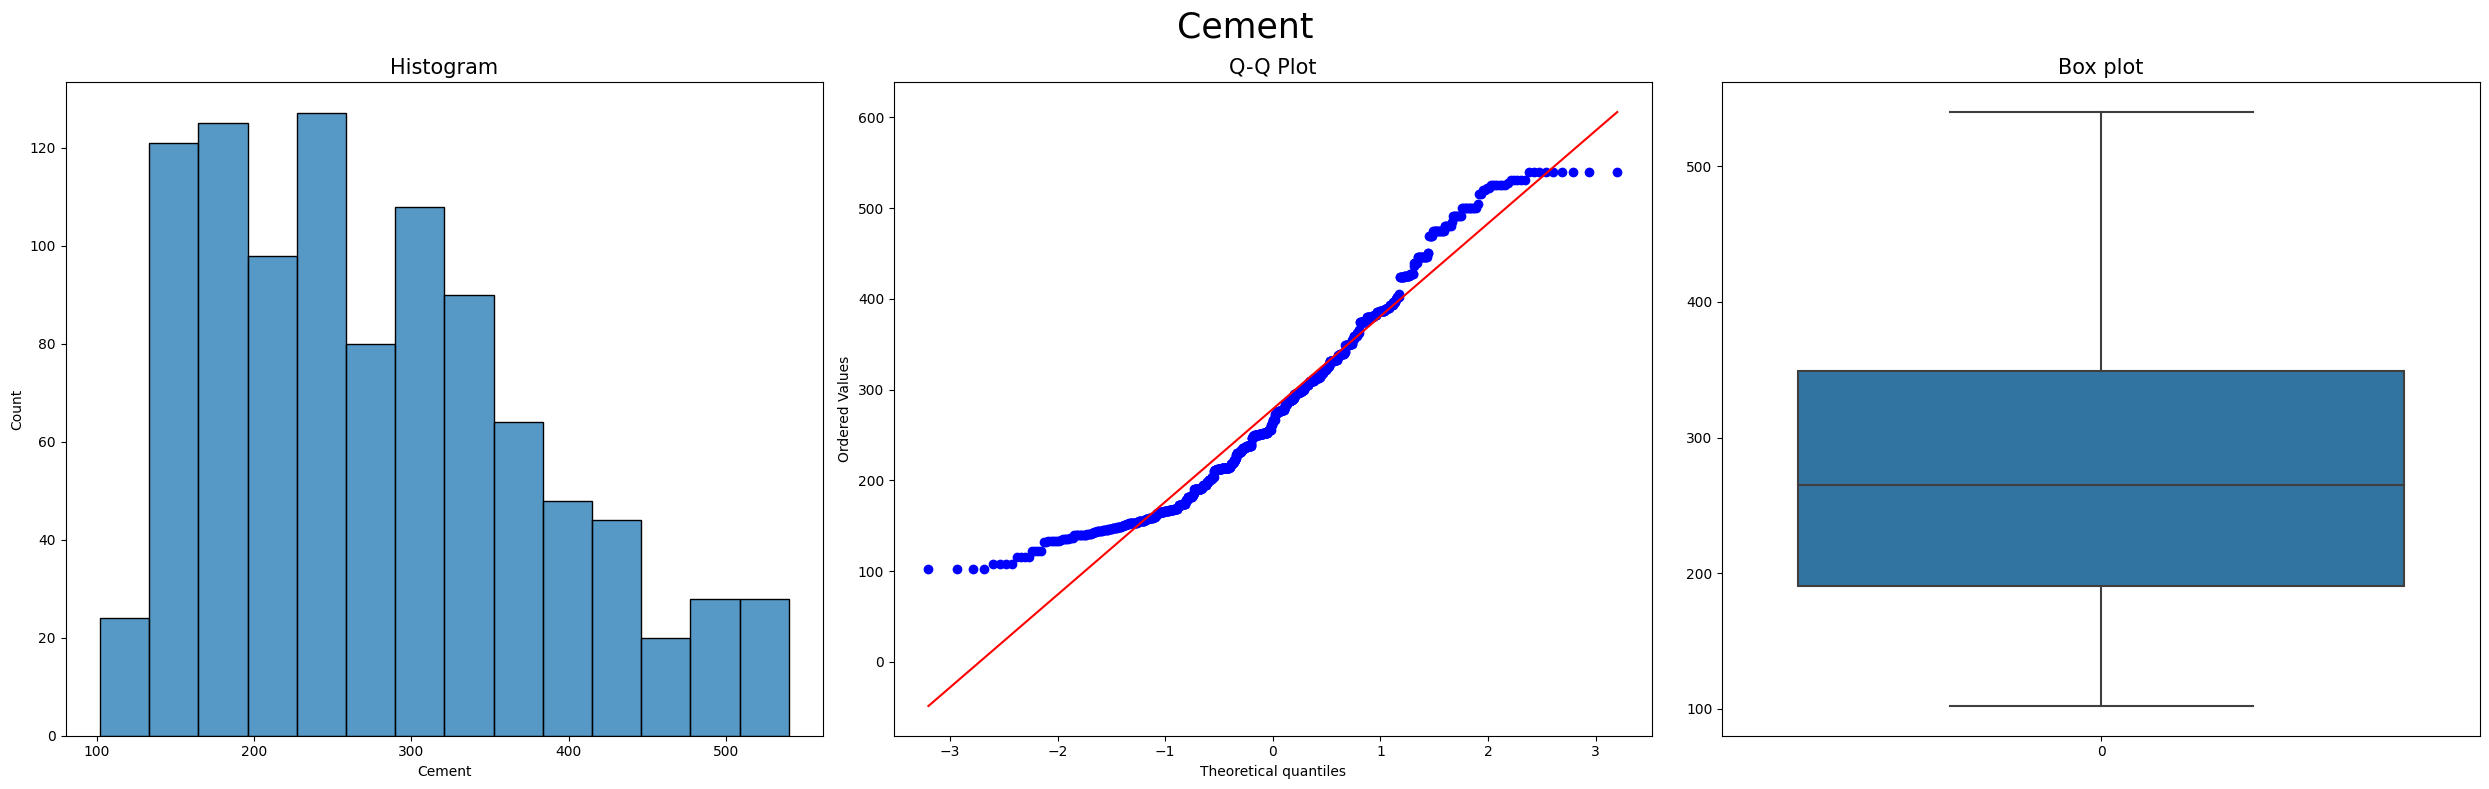

In [35]:
feature_analysis_for_outliers(df, 'Cement')

**Few Insights:** No Outliers in Cement.

#### b. Furnace_Slag

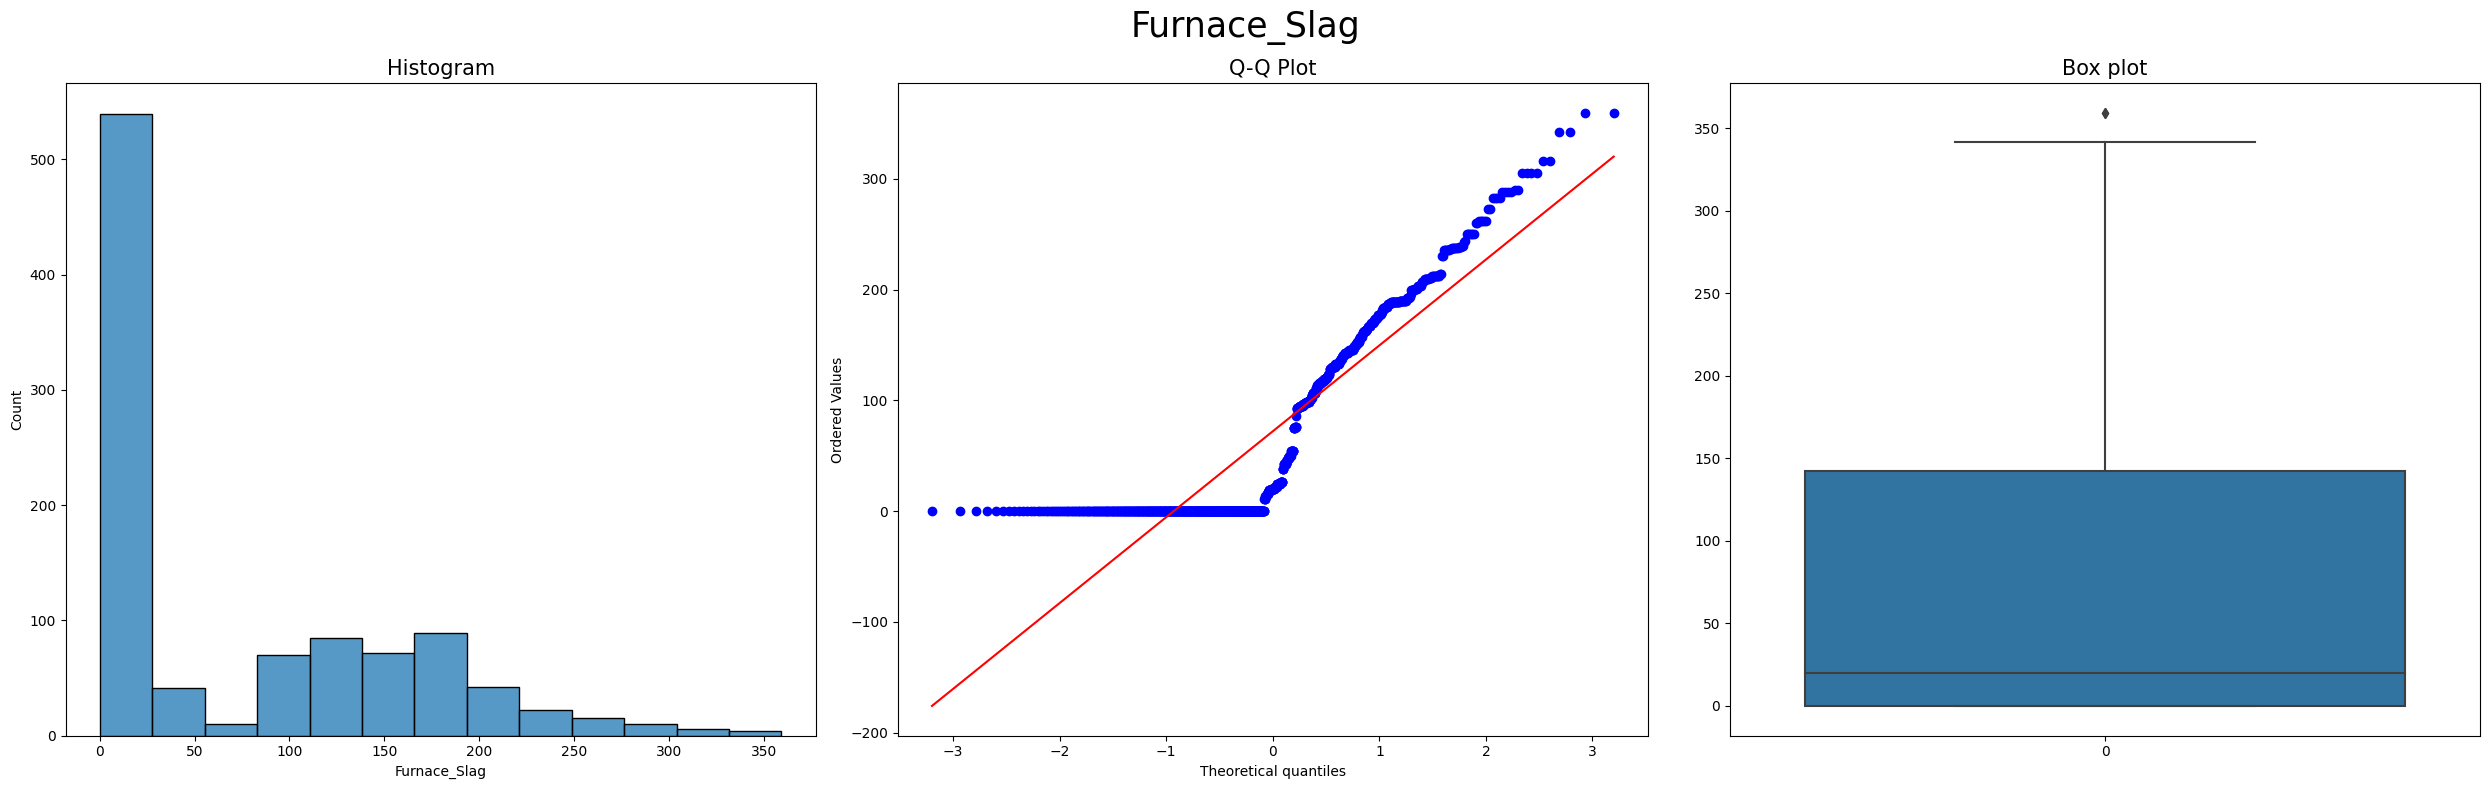

In [36]:
feature_analysis_for_outliers(df, 'Furnace_Slag')

In [37]:
# As Furnace Slag distribution is not gaussian, let's peform IQR

Using IQR method for outlier detection
The feature Furnace_Slag contains 0.199% of outliers.
The lower_limit for Furnace_Slag is -213.75
The upper_limit for Furnace_Slag is 356.25


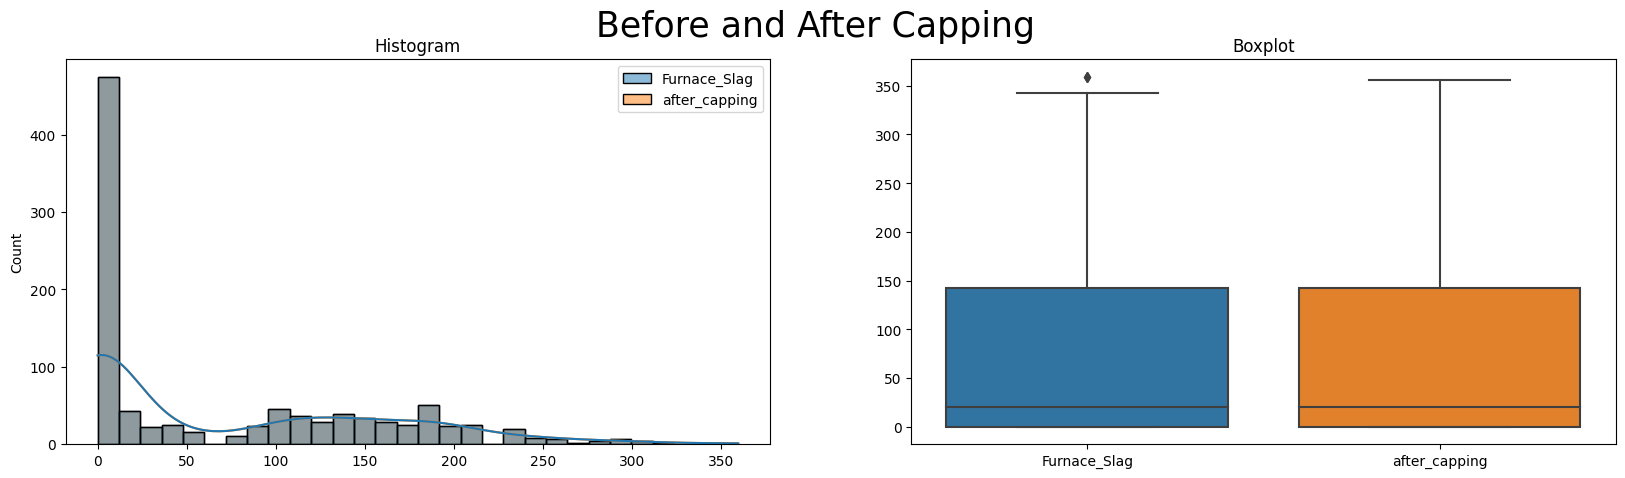

In [38]:
lower_limit_iqr, upper_limit_iqr = outlier_percentage(df, variable='Furnace_Slag')
check_capping(df,'Furnace_Slag', lower_limit_iqr, upper_limit_iqr)

Using Percentiles method for outlier detection
The feature Furnace_Slag contains 4.876% of outliers.
The lower_limit for Furnace_Slag is 0.0
The upper_limit for Furnace_Slag is 236.0


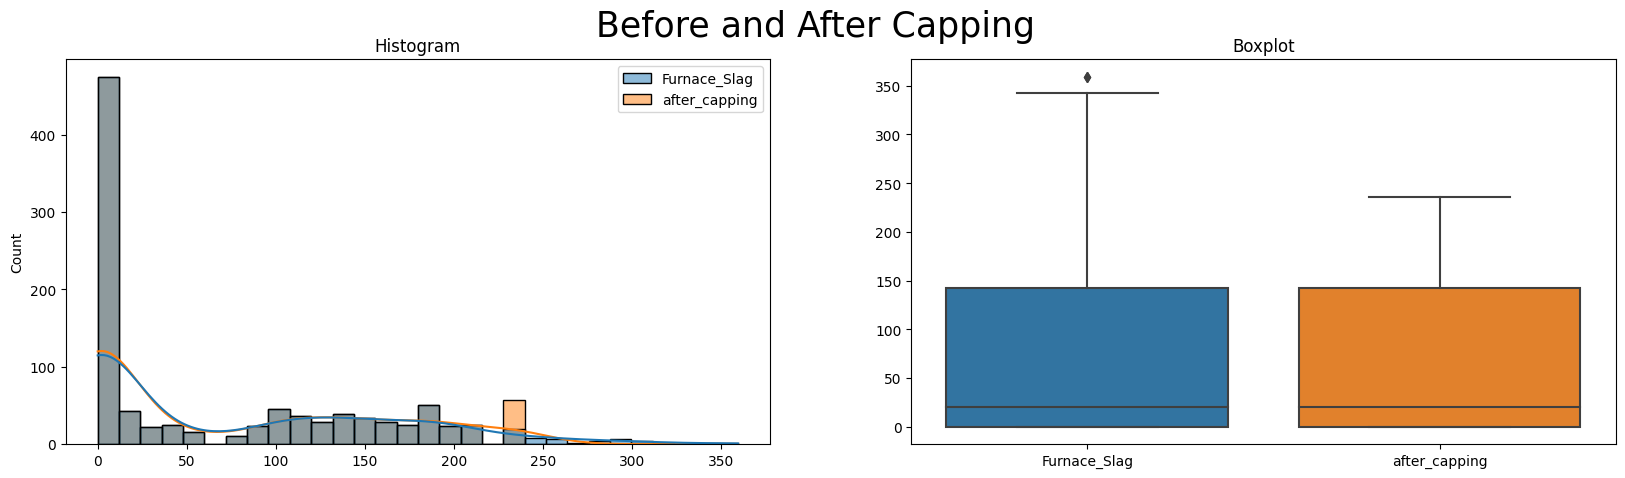

In [39]:
lower_limit_percentile, upper_limit_percentile = outlier_percentage(df, variable='Furnace_Slag', type="Winsorization")
check_capping(df,'Furnace_Slag', lower_limit_percentile, upper_limit_percentile)

In [40]:
# I prefer iqr method over percentiles for furnace slag, as there is less distortion after capping

In [41]:
perform_capping(df, "Furnace_Slag", lower_limit=lower_limit_iqr, upper_limit=upper_limit_iqr)

'Outliers are replaced/ capped with lower_limit and upper_limit values in Furnace_Slag'

#### c. Fly Ash

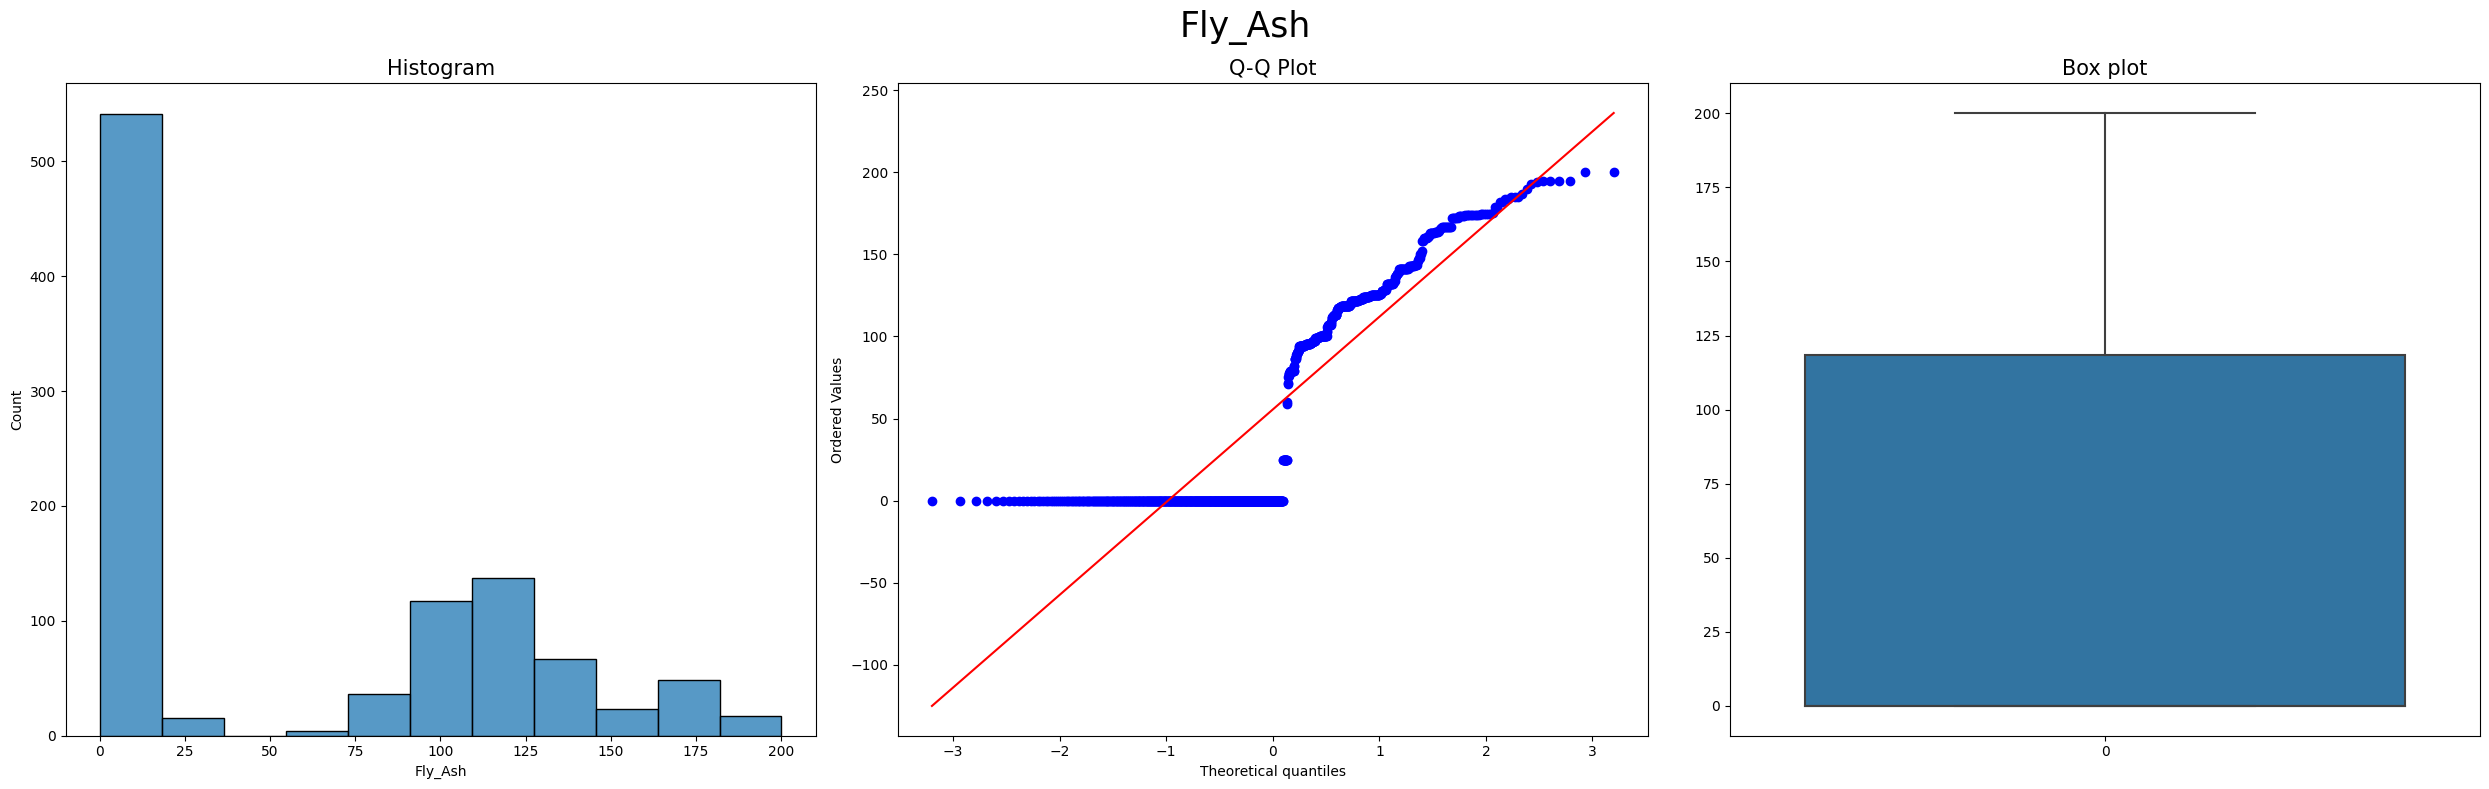

In [42]:
feature_analysis_for_outliers(df, 'Fly_Ash')

**Few Insights:** No Outliers in Fly Ash.

#### d. Water

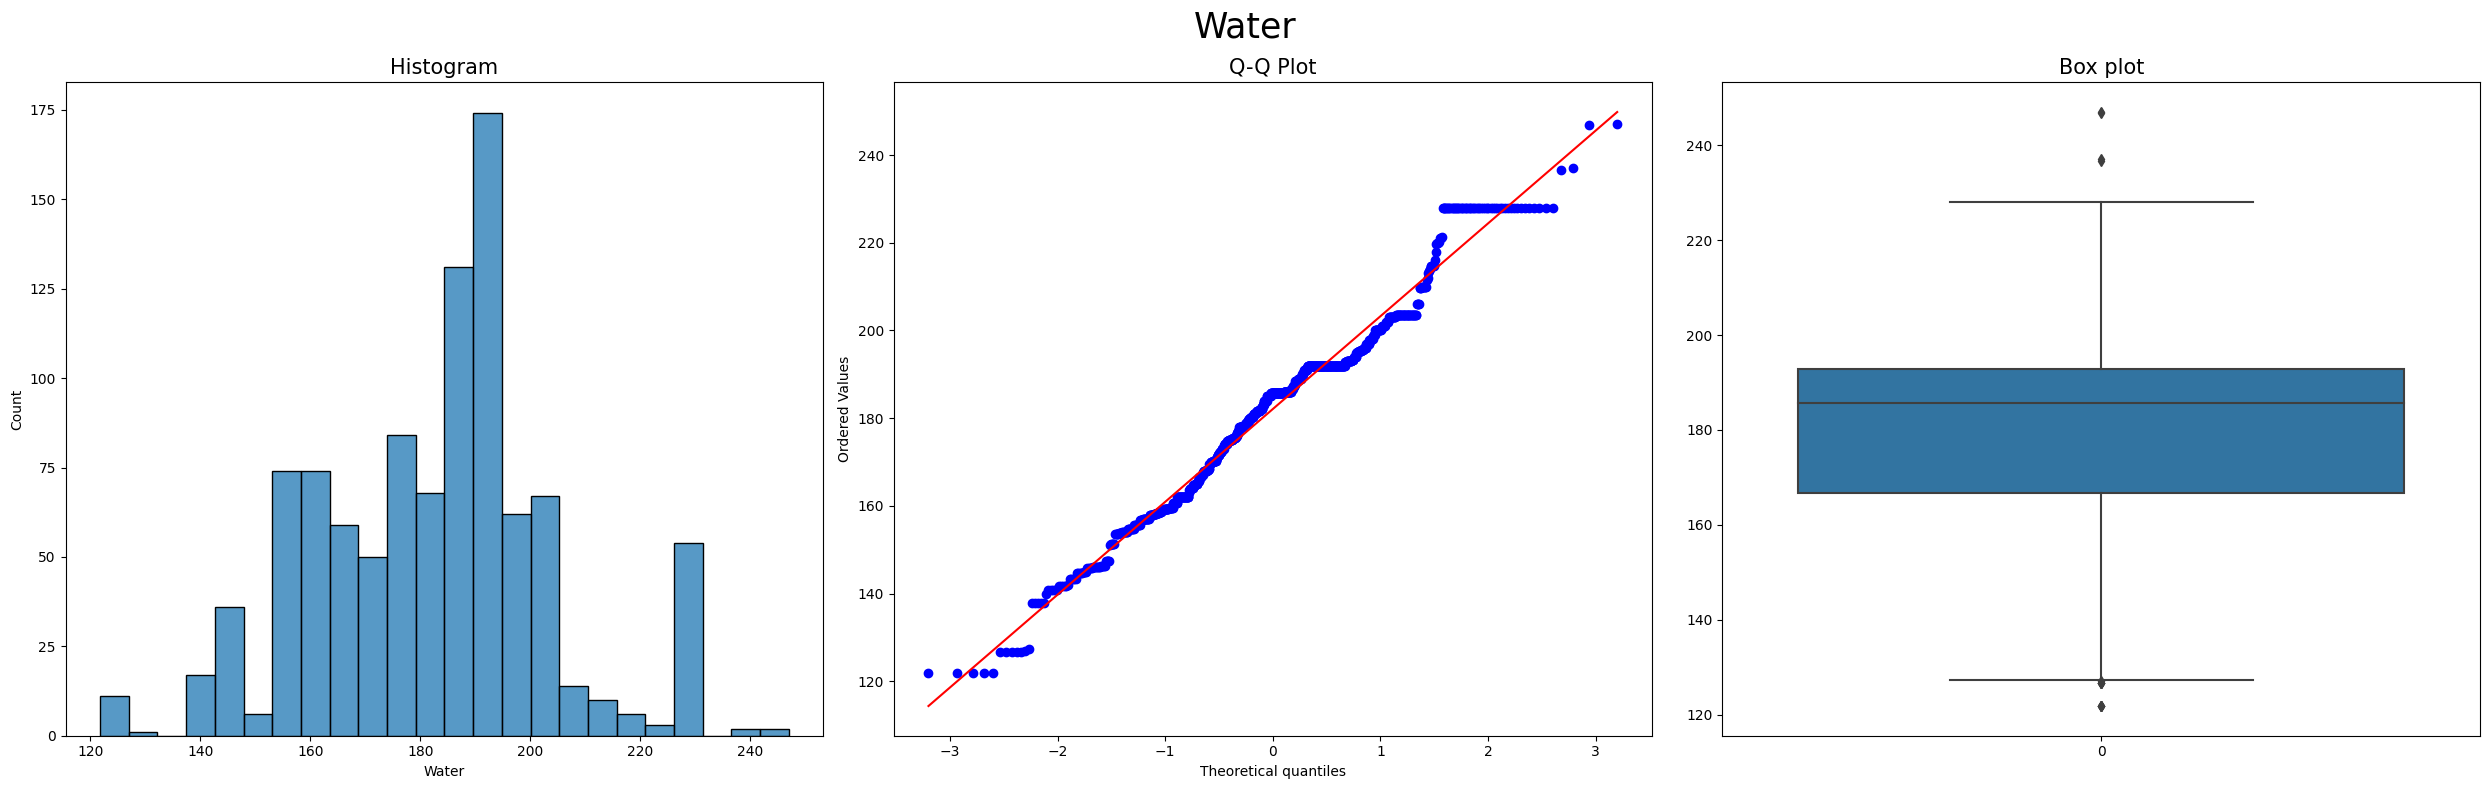

In [43]:
feature_analysis_for_outliers(df, 'Water')

Using Gaussian method for outlier detection
The feature Water contains 0.199% of outliers.
The lower_limit for Water is 118.05732112025069
The upper_limit for Water is 246.0933256459185


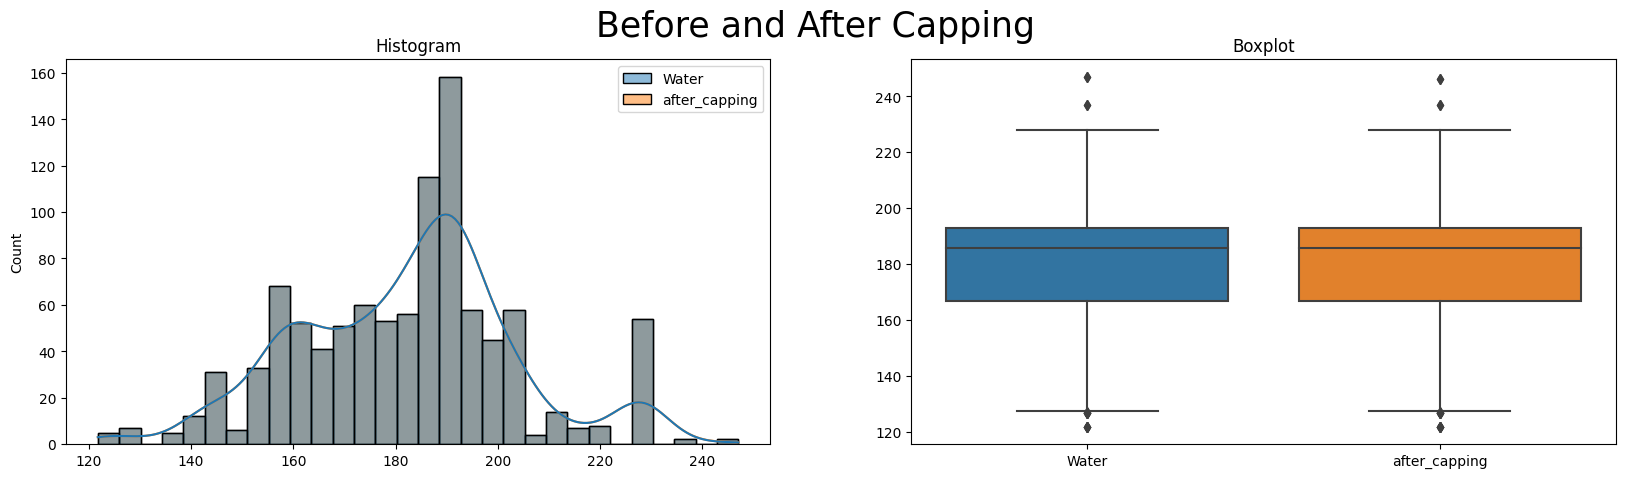

In [44]:
# This is more or less gaussian ditributed, let's cap it with gaussian
lower_limit_gaussian, upper_limit_gaussian = outlier_percentage(df, variable='Water', type="Gaussian")
check_capping(df,'Water', lower_limit_gaussian, upper_limit_gaussian)

Using IQR method for outlier detection
The feature Water contains 1.493% of outliers.
The lower_limit for Water is 127.14999999999998
The upper_limit for Water is 232.35000000000002


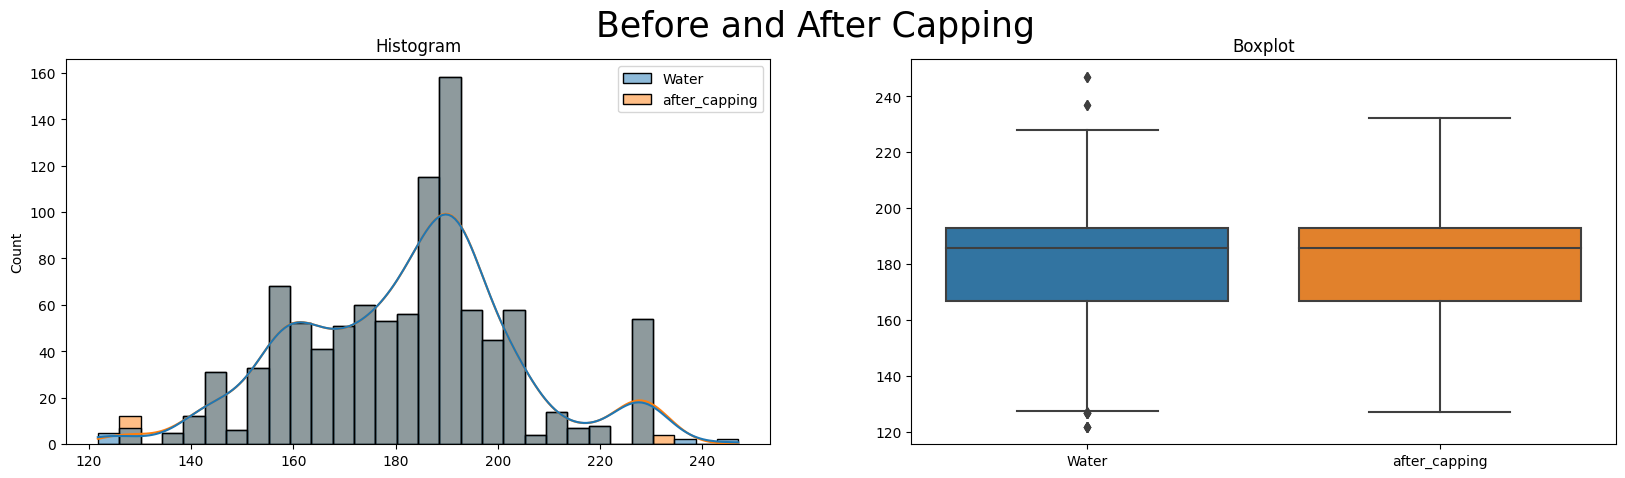

In [45]:
lower_limit_iqr, upper_limit_iqr = outlier_percentage(df, variable='Water', type="IQR")
check_capping(df,'Water', lower_limit_iqr, upper_limit_iqr)

Using Percentiles method for outlier detection
The feature Water contains 5.373% of outliers.
The lower_limit for Water is 146.1
The upper_limit for Water is 228.0


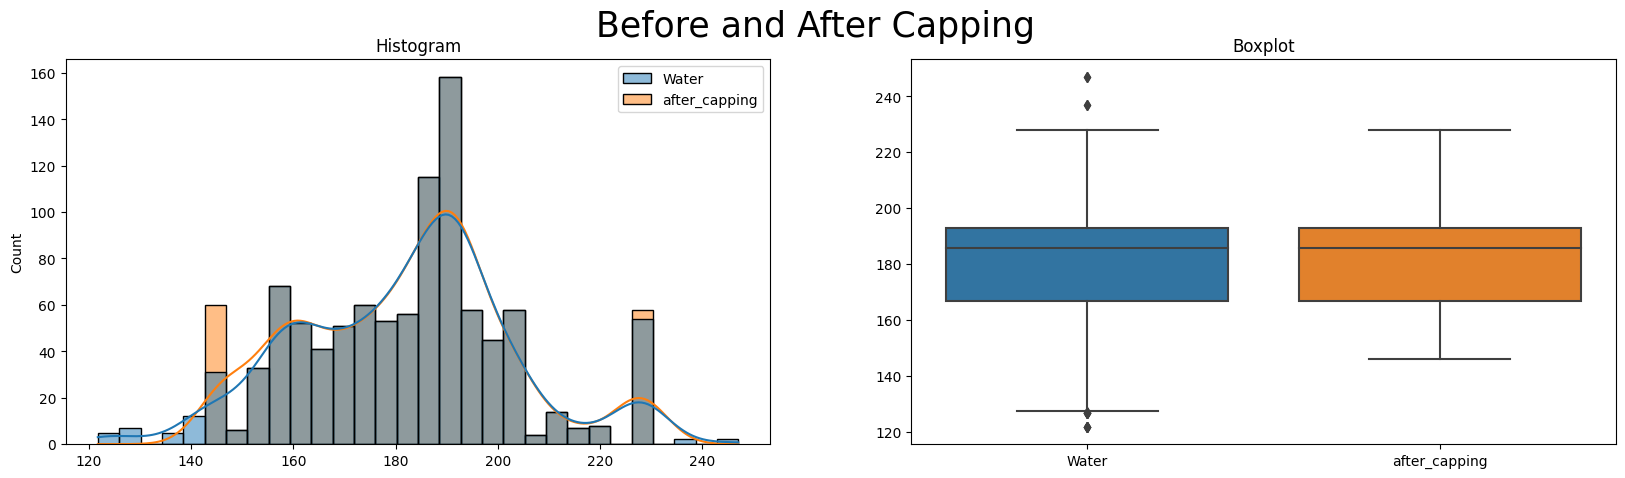

In [46]:
lower_limit_percentile, upper_limit_percentile = outlier_percentage(df, variable='Water', type="Winsorization")
check_capping(df,'Water', lower_limit_percentile, upper_limit_percentile)

In [47]:
perform_capping(df, 'Water', lower_limit_iqr, upper_limit_iqr)

'Outliers are replaced/ capped with lower_limit and upper_limit values in Water'

#### e. Superplasticizer

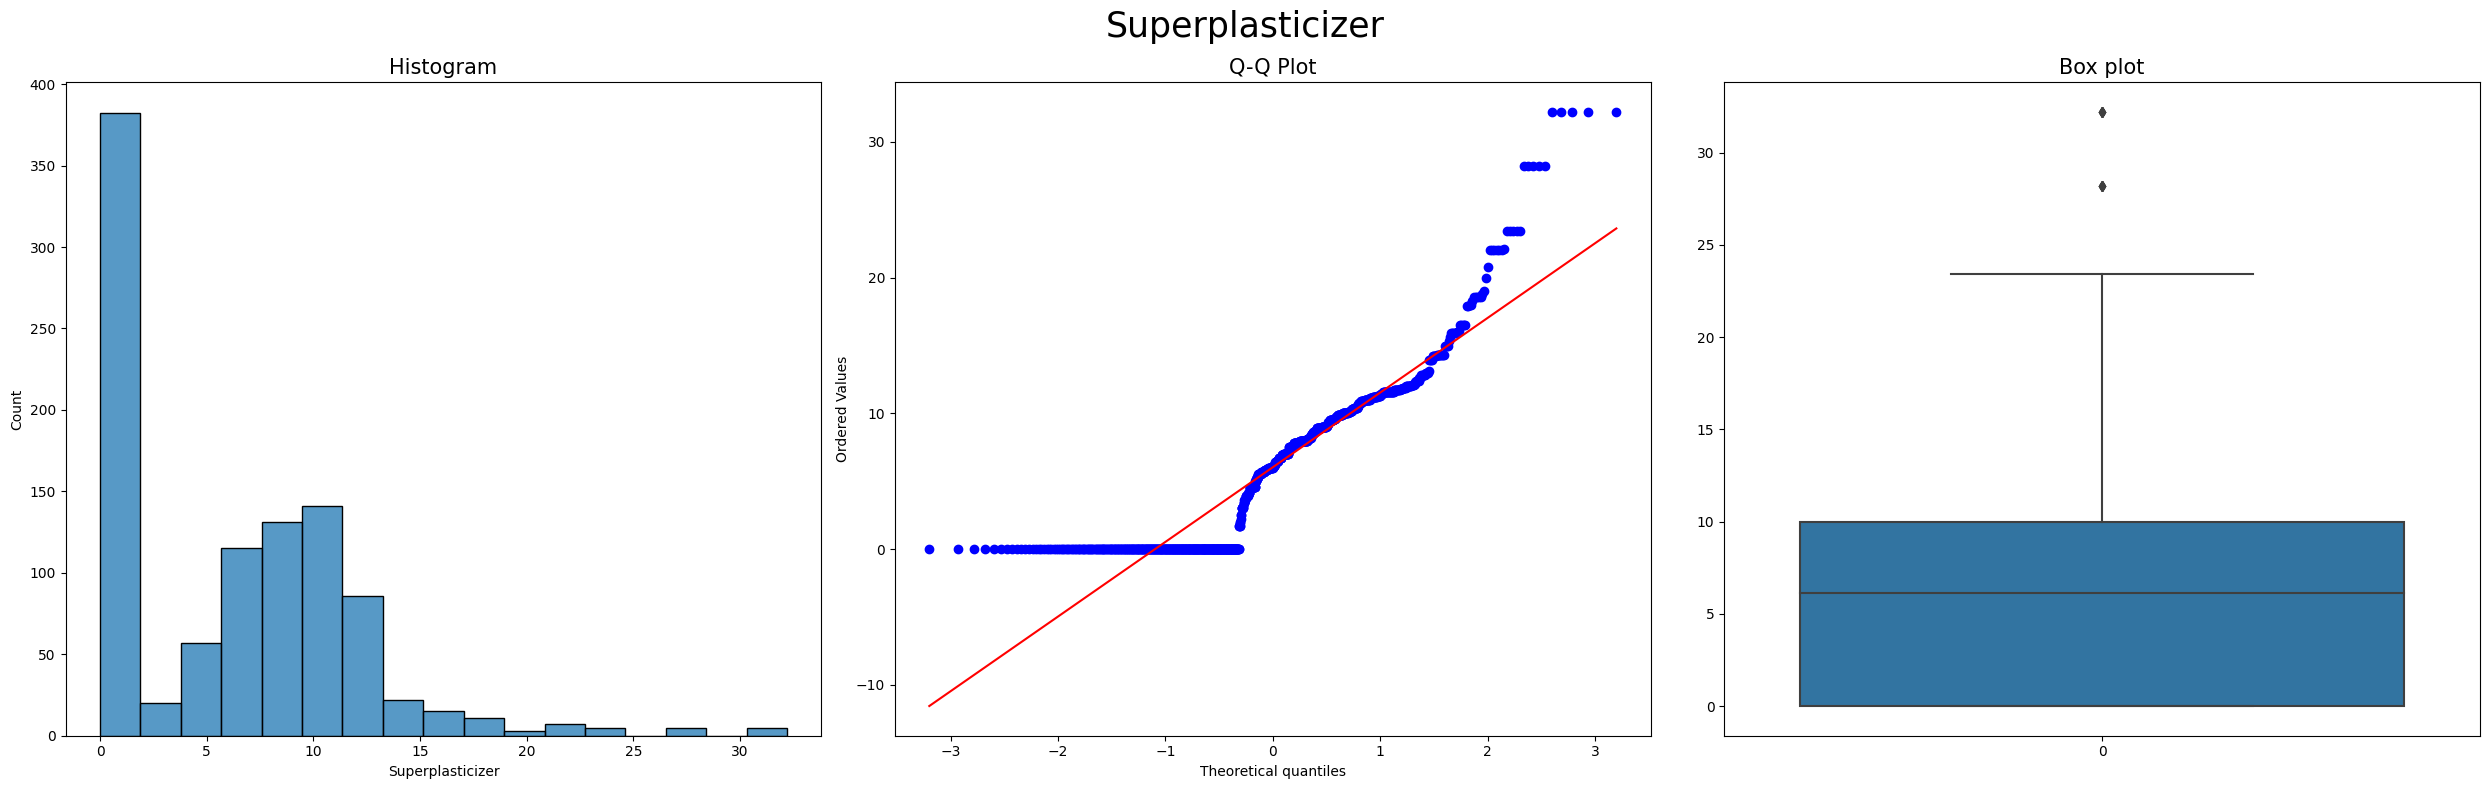

In [48]:
feature_analysis_for_outliers(df, 'Superplasticizer')

In [49]:
# As the distribution for superplaticizer is not gaussian, let's perform iqr and percentile method for outliers

Using IQR method for outlier detection
The feature Superplasticizer contains 0.995% of outliers.
The lower_limit for Superplasticizer is -15.0
The upper_limit for Superplasticizer is 25.0


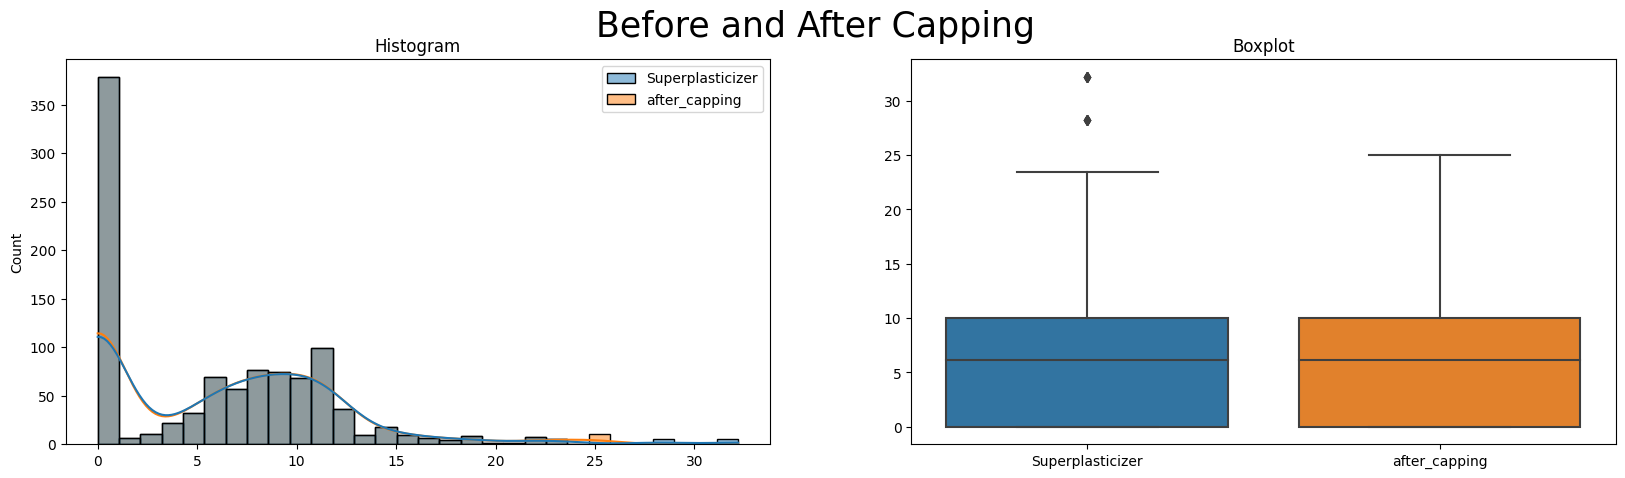

In [50]:
lower_limit_iqr, upper_limit_iqr = outlier_percentage(df, variable='Superplasticizer', type="IQR")
check_capping(df,'Superplasticizer', lower_limit_iqr, upper_limit_iqr)

Using Percentiles method for outlier detection
The feature Superplasticizer contains 5.075% of outliers.
The lower_limit for Superplasticizer is 0.0
The upper_limit for Superplasticizer is 15.239999999999988


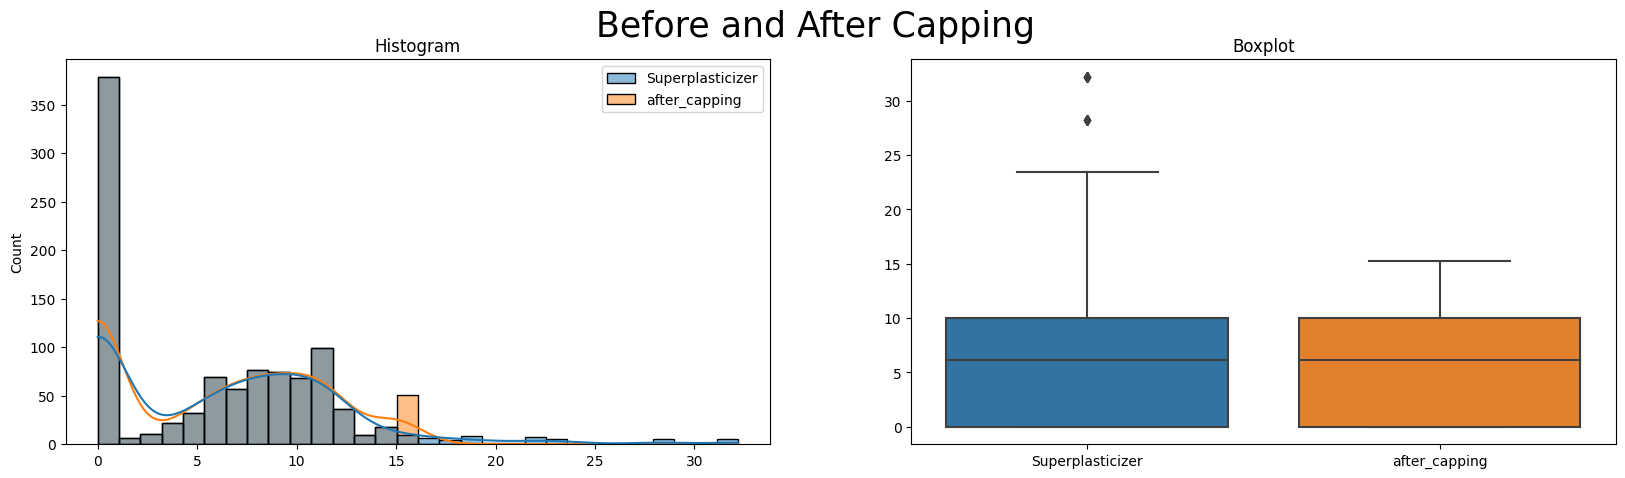

In [51]:
lower_limit_percentile, upper_limit_percentile = outlier_percentage(df, variable='Superplasticizer', type="Winsorization")
check_capping(df,'Superplasticizer', lower_limit_percentile, upper_limit_percentile)

In [52]:
# let's perform iqr method for capping as it distorts only slightly the distribution of the superplasticizer
perform_capping(df, 'Superplasticizer', lower_limit_iqr, upper_limit_iqr)

'Outliers are replaced/ capped with lower_limit and upper_limit values in Superplasticizer'

####  f. Coarse_Aggregate

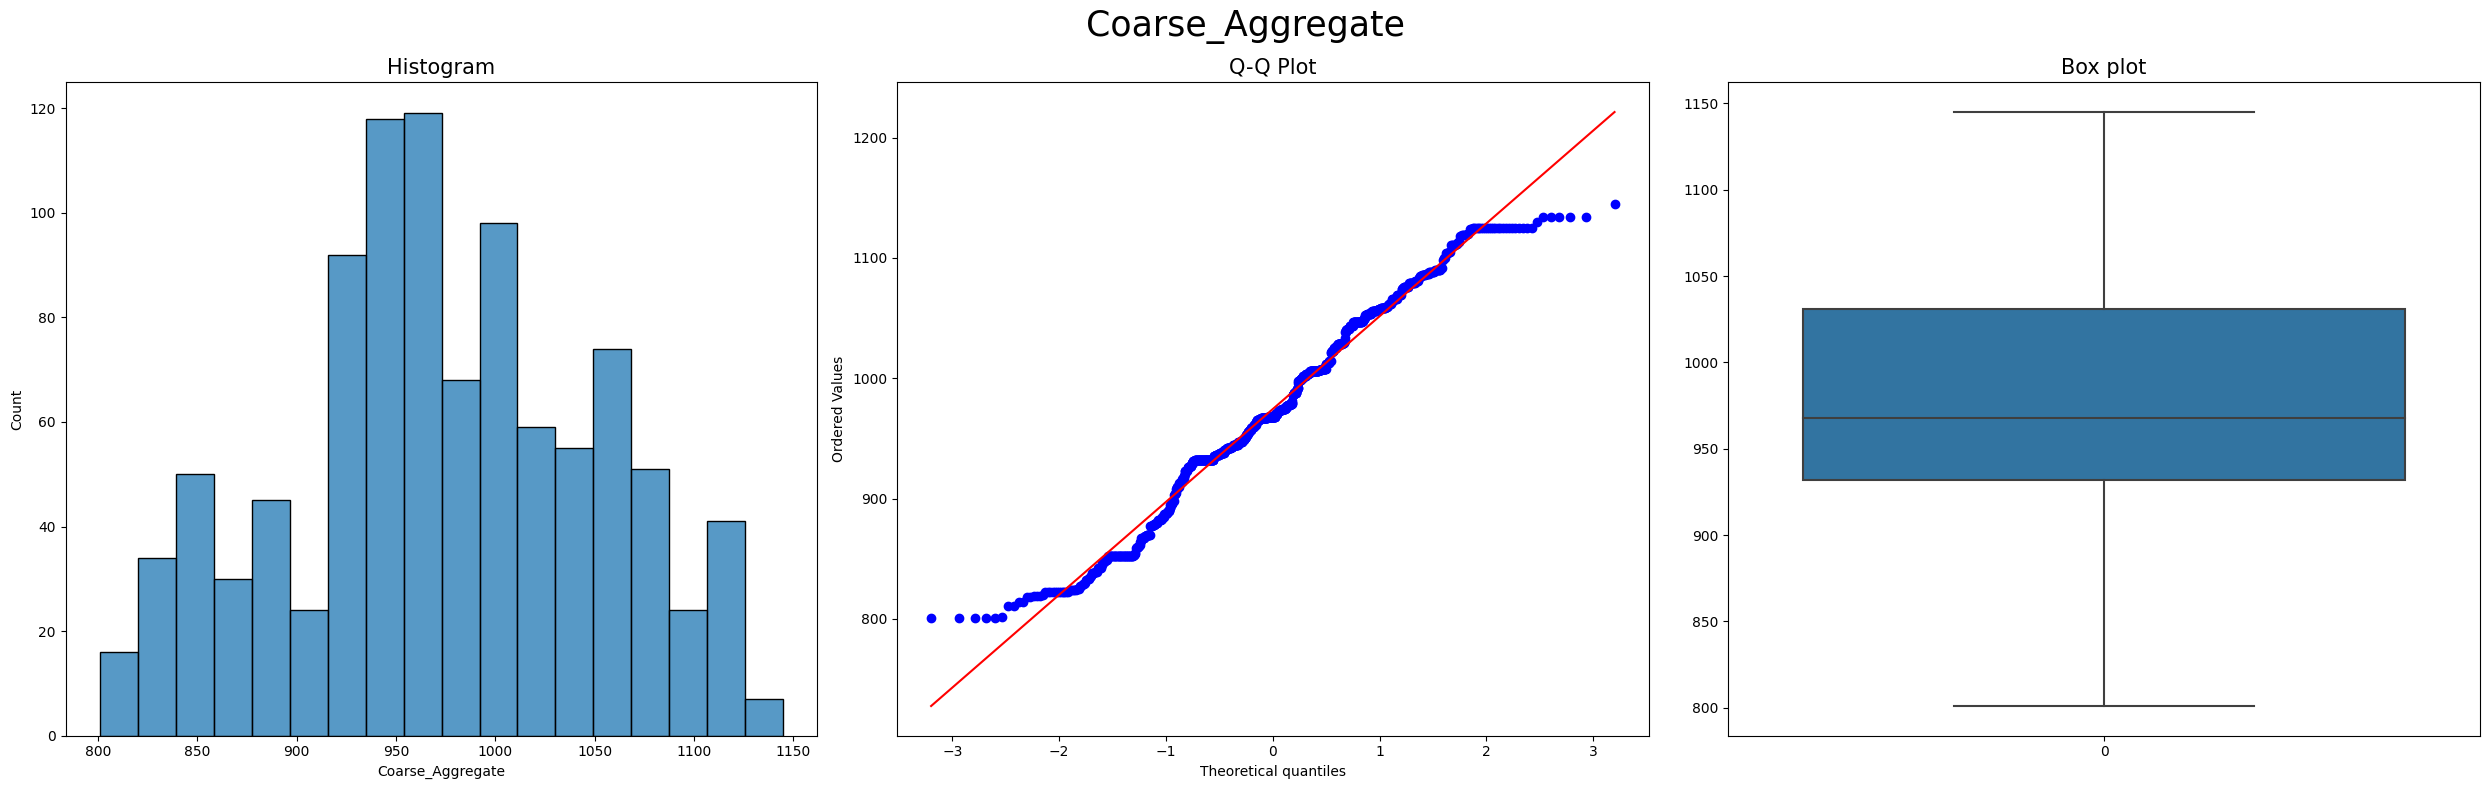

In [53]:
feature_analysis_for_outliers(df, 'Coarse_Aggregate')

**Few Insights:** No Outliers in Coarse_Aggregate.

#### g. Fine_Aggregate

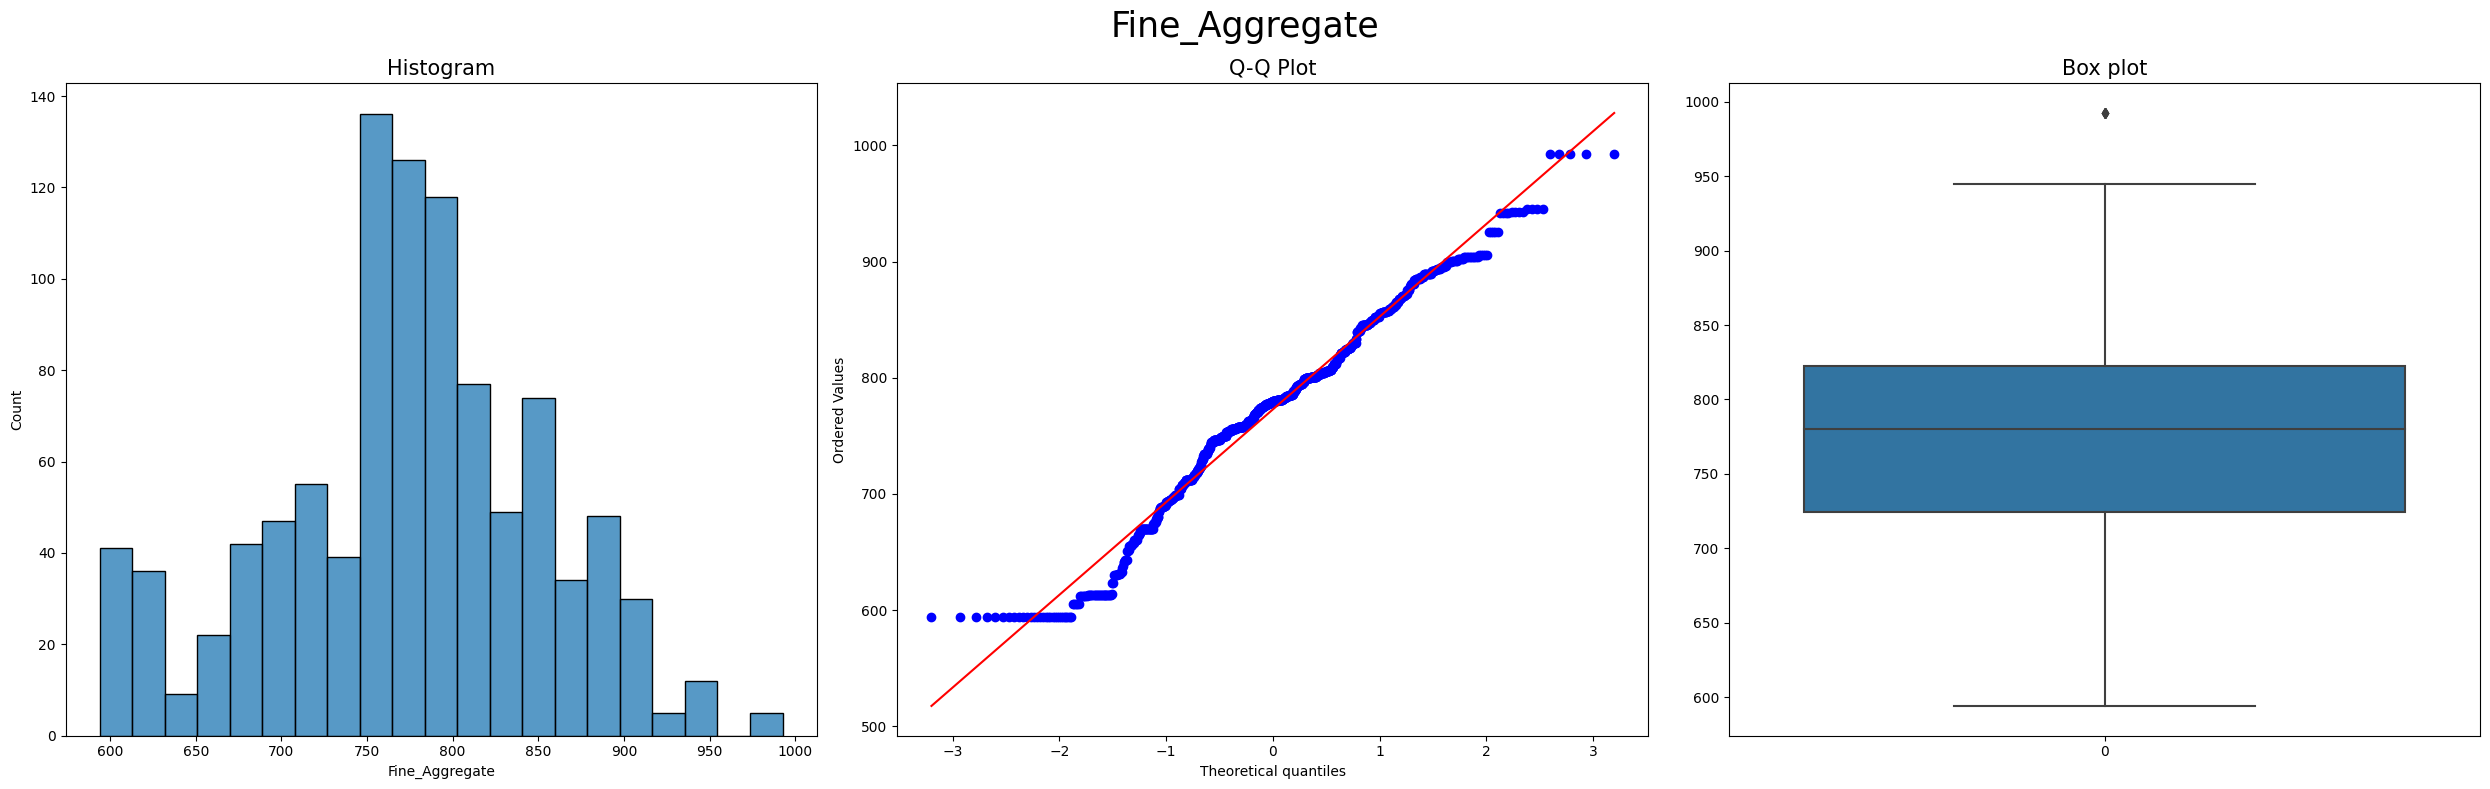

In [54]:
feature_analysis_for_outliers(df, 'Fine_Aggregate')

Using IQR method for outlier detection
The feature Fine_Aggregate contains 0.498% of outliers.
The lower_limit for Fine_Aggregate is 577.4499999999998
The upper_limit for Fine_Aggregate is 969.0500000000002


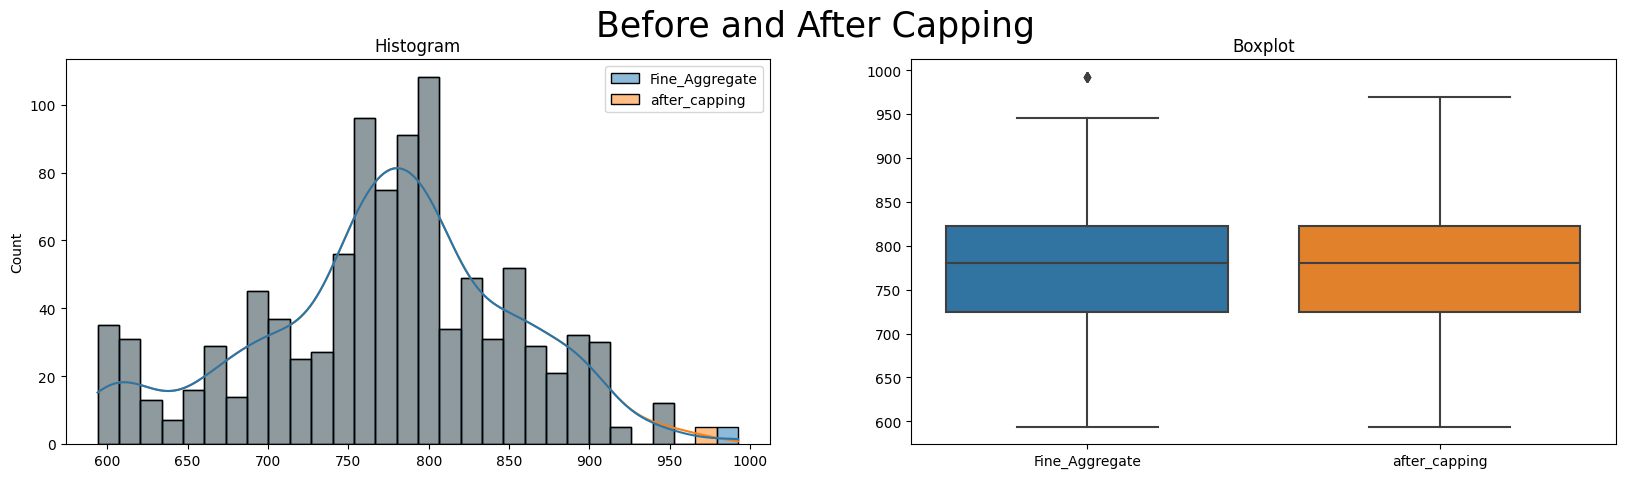

Using Percentiles method for outlier detection
The feature Fine_Aggregate contains 8.756% of outliers.
The lower_limit for Fine_Aggregate is 613.0
The upper_limit for Fine_Aggregate is 899.8


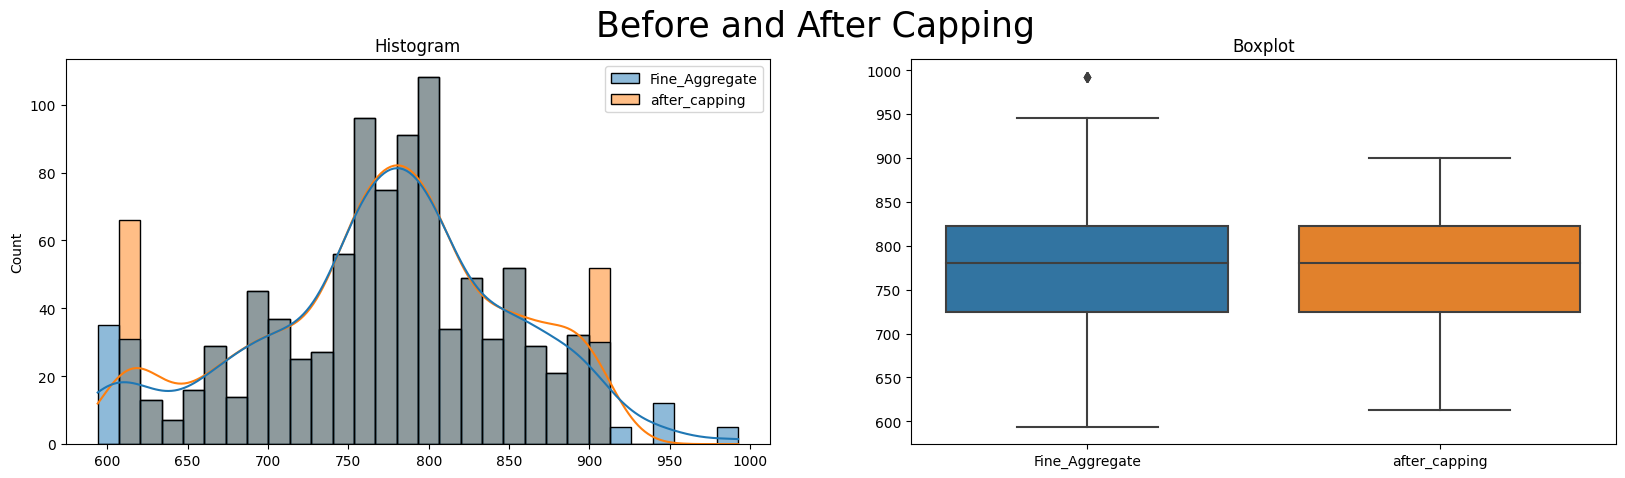

Using Gaussian method for outlier detection
The feature Fine_Aggregate contains 0.0% of outliers.
The lower_limit for Fine_Aggregate is 531.6669547575311
The upper_limit for Fine_Aggregate is 1013.7095626554042


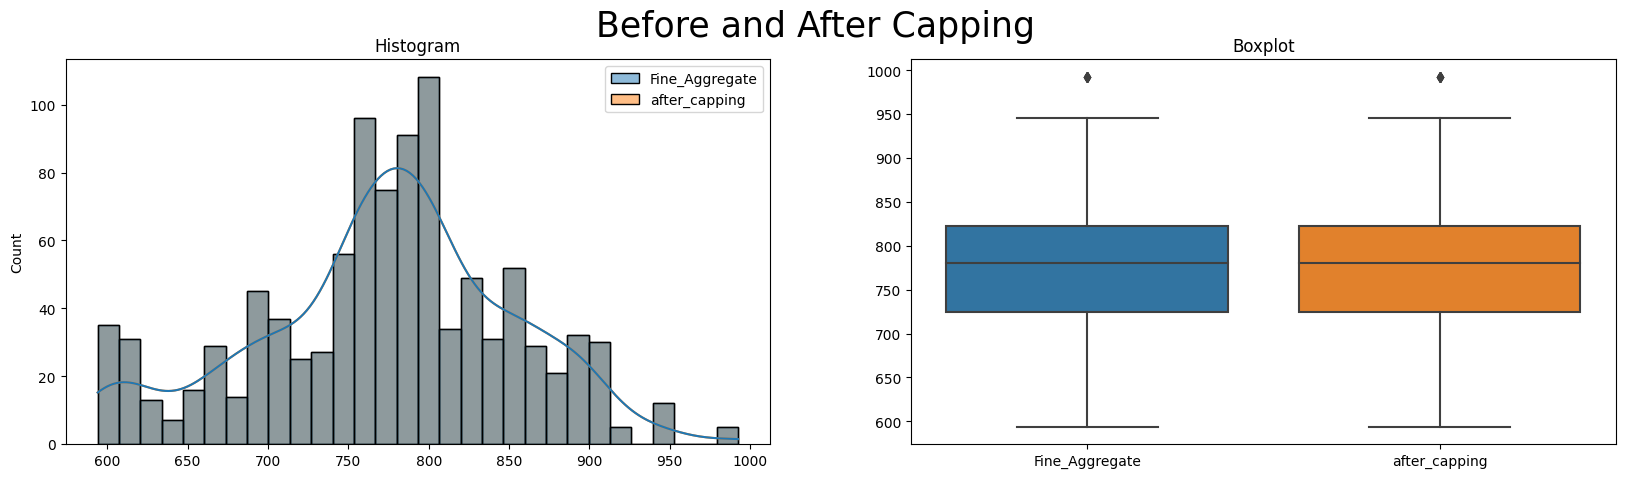

In [55]:
lower_limit_iqr, upper_limit_iqr = outlier_percentage(df, variable='Fine_Aggregate', type="IQR")
check_capping(df,'Fine_Aggregate', lower_limit_iqr, upper_limit_iqr)

lower_limit_percentile, upper_limit_percentile = outlier_percentage(df, variable='Fine_Aggregate', type="Winsorization")
check_capping(df,'Fine_Aggregate', lower_limit_percentile, upper_limit_percentile)

lower_limit_gaussian, upper_limit_gaussian = outlier_percentage(df, variable='Fine_Aggregate', type="Gaussian")
check_capping(df,'Fine_Aggregate', lower_limit_gaussian, upper_limit_gaussian)


In [56]:
perform_capping(df, 'Fine_Aggregate', lower_limit_iqr, upper_limit_iqr)

'Outliers are replaced/ capped with lower_limit and upper_limit values in Fine_Aggregate'

#### h. Age

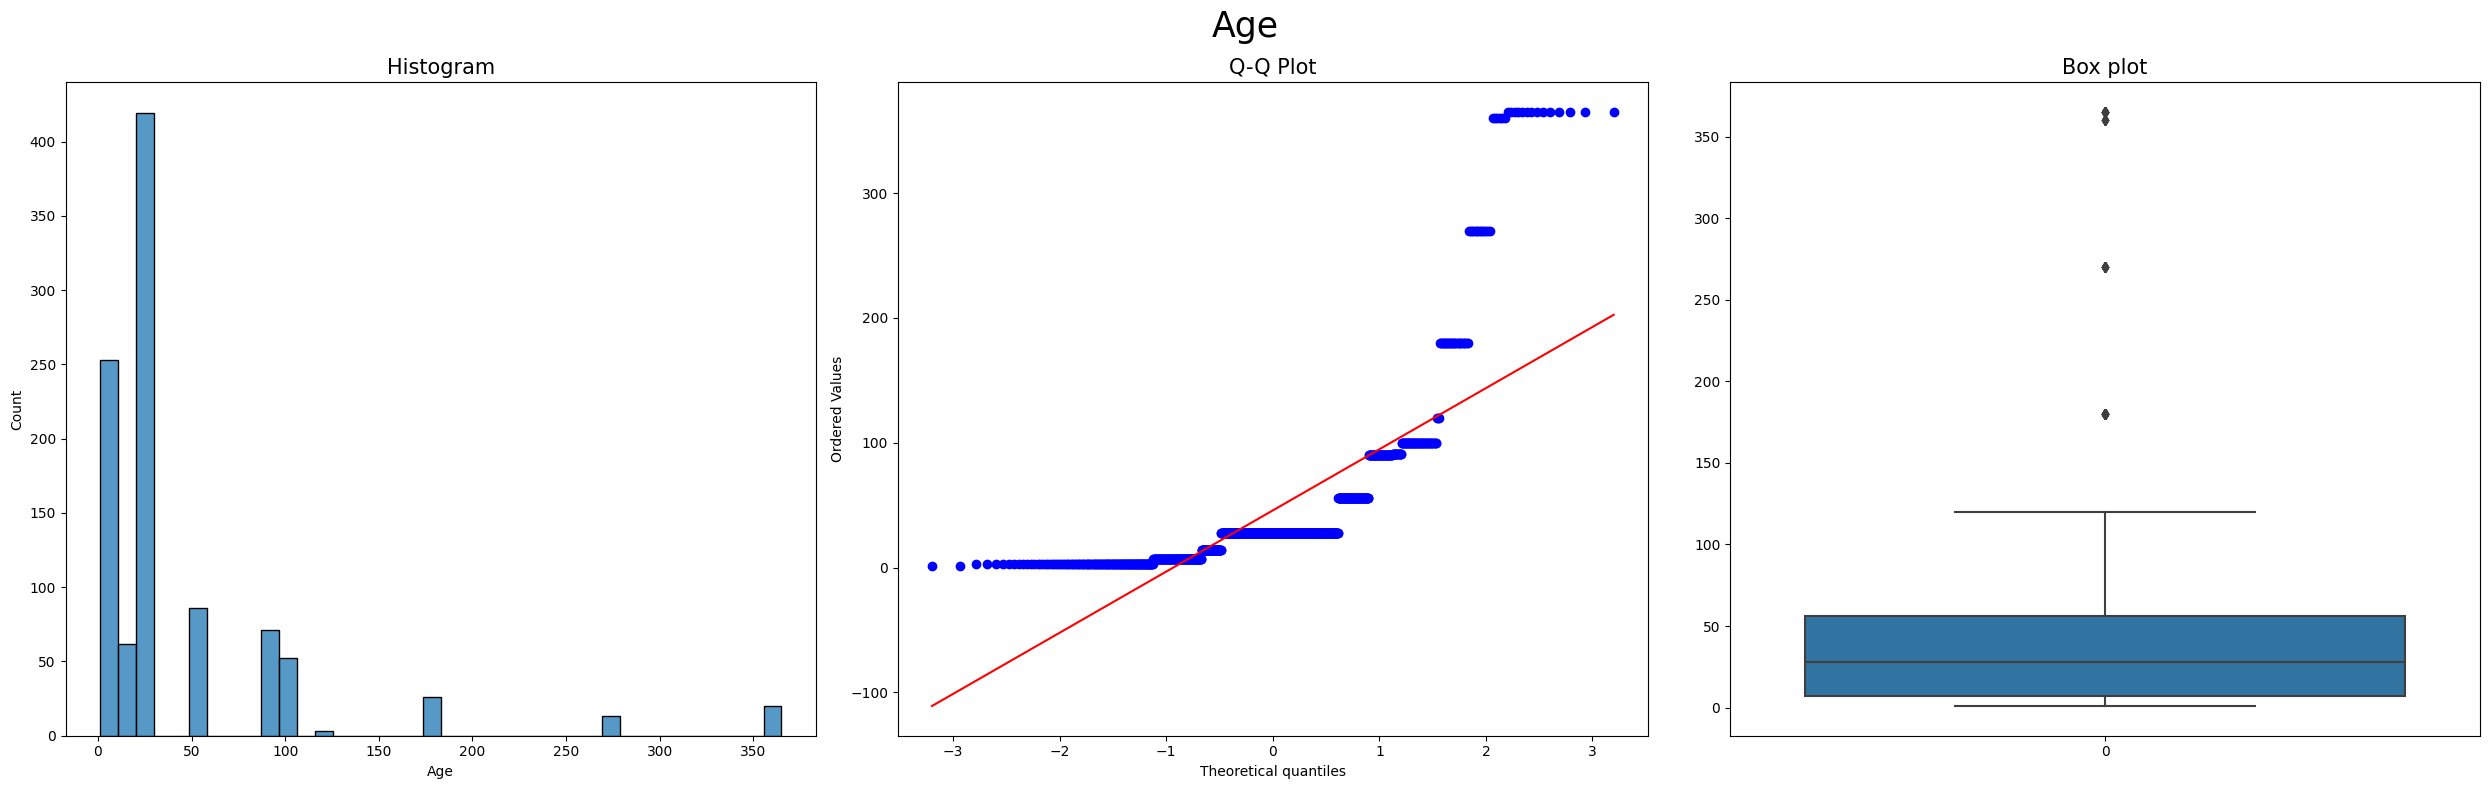

In [57]:
feature_analysis_for_outliers(df, 'Age')

Using IQR method for outlier detection
The feature Age contains 5.871% of outliers.
The lower_limit for Age is -66.5
The upper_limit for Age is 129.5


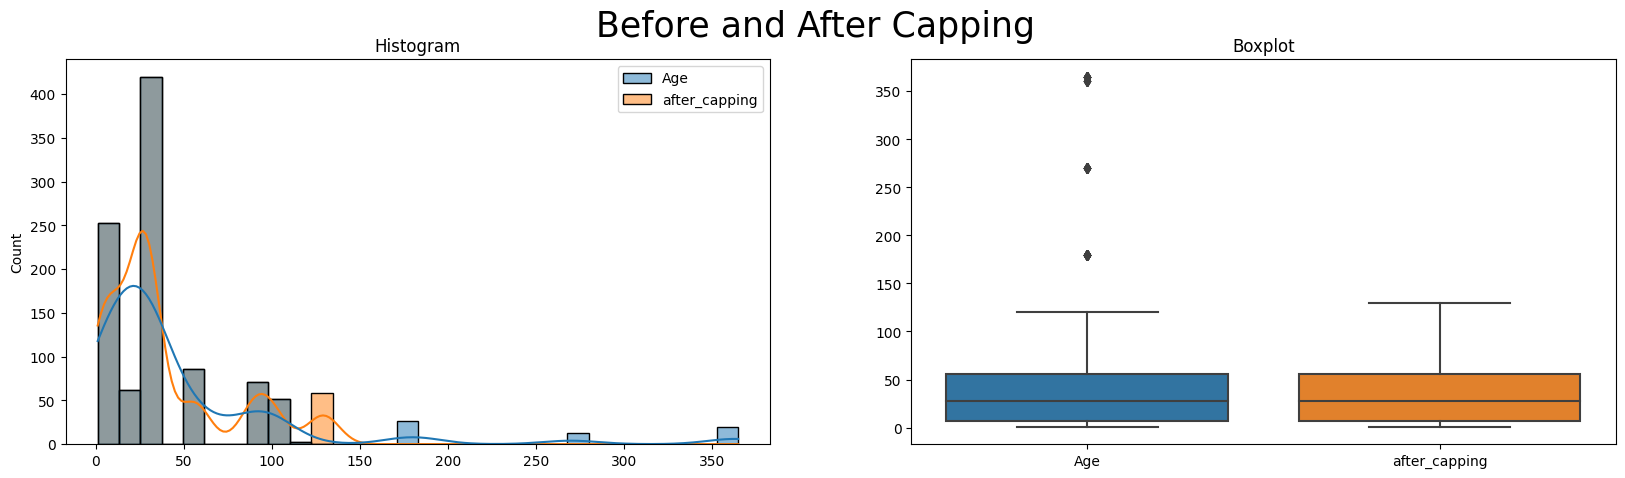

Using Percentiles method for outlier detection
The feature Age contains 6.07% of outliers.
The lower_limit for Age is 3.0
The upper_limit for Age is 120.0


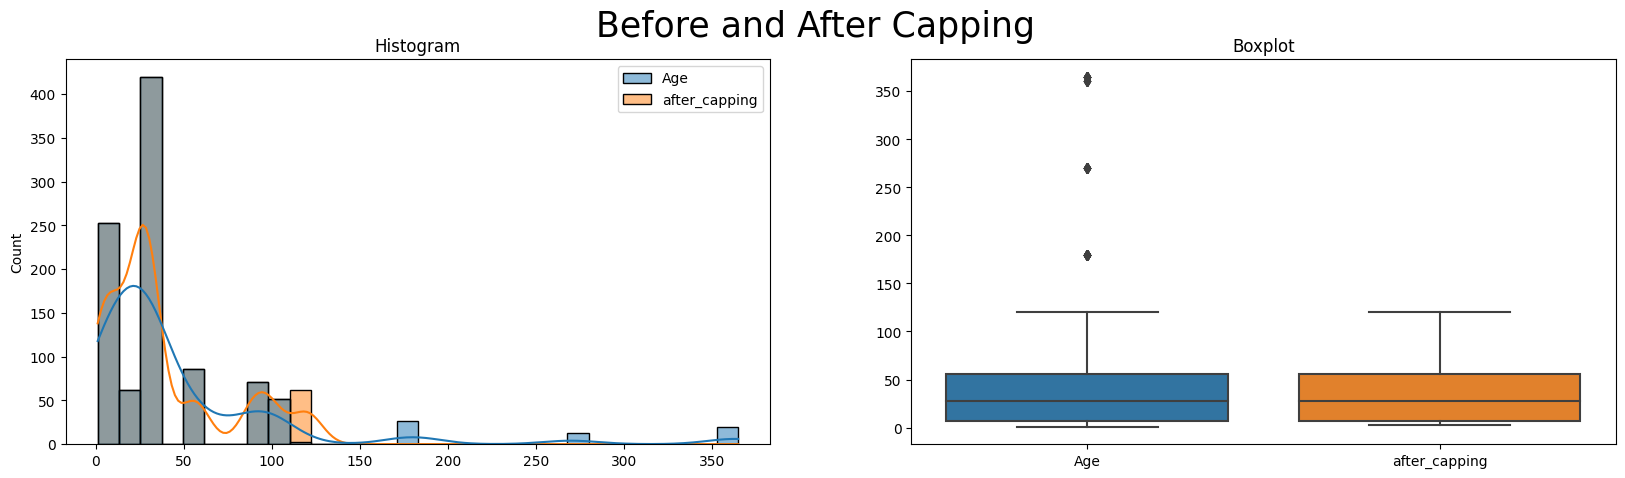

Using Gaussian method for outlier detection
The feature Age contains 3.284% of outliers.
The lower_limit for Age is -145.34735862033943
The upper_limit for Age is 237.0607914561603


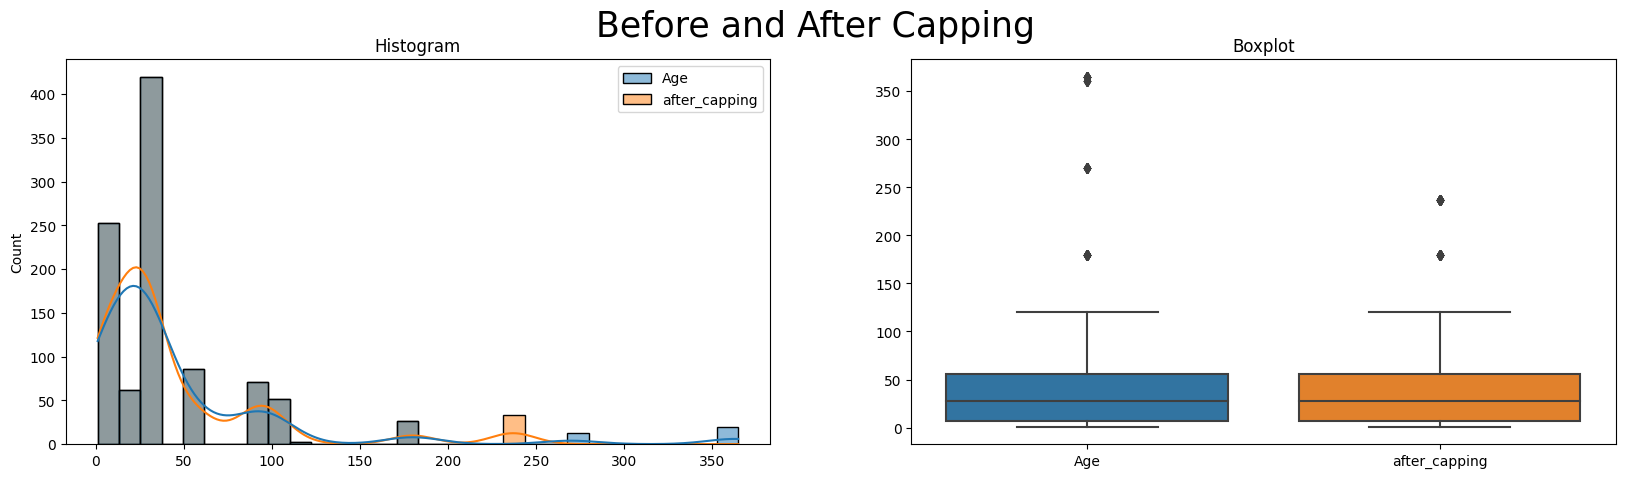

In [58]:
variable='Age'
lower_limit_iqr, upper_limit_iqr = outlier_percentage(df, variable, type="IQR")
check_capping(df,variable, lower_limit_iqr, upper_limit_iqr)

lower_limit_percentile, upper_limit_percentile = outlier_percentage(df, variable, type="Winsorization", lower_quantile=0.05, upper_quantile=0.94)
check_capping(df,variable, lower_limit_percentile, upper_limit_percentile)

lower_limit_gaussian, upper_limit_gaussian = outlier_percentage(df, variable, type="Gaussian")
check_capping(df,variable, lower_limit_gaussian, upper_limit_gaussian)


In [59]:
perform_capping(df, 'Age', lower_limit_percentile, upper_limit_percentile)

'Outliers are replaced/ capped with lower_limit and upper_limit values in Age'

In [60]:
df.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

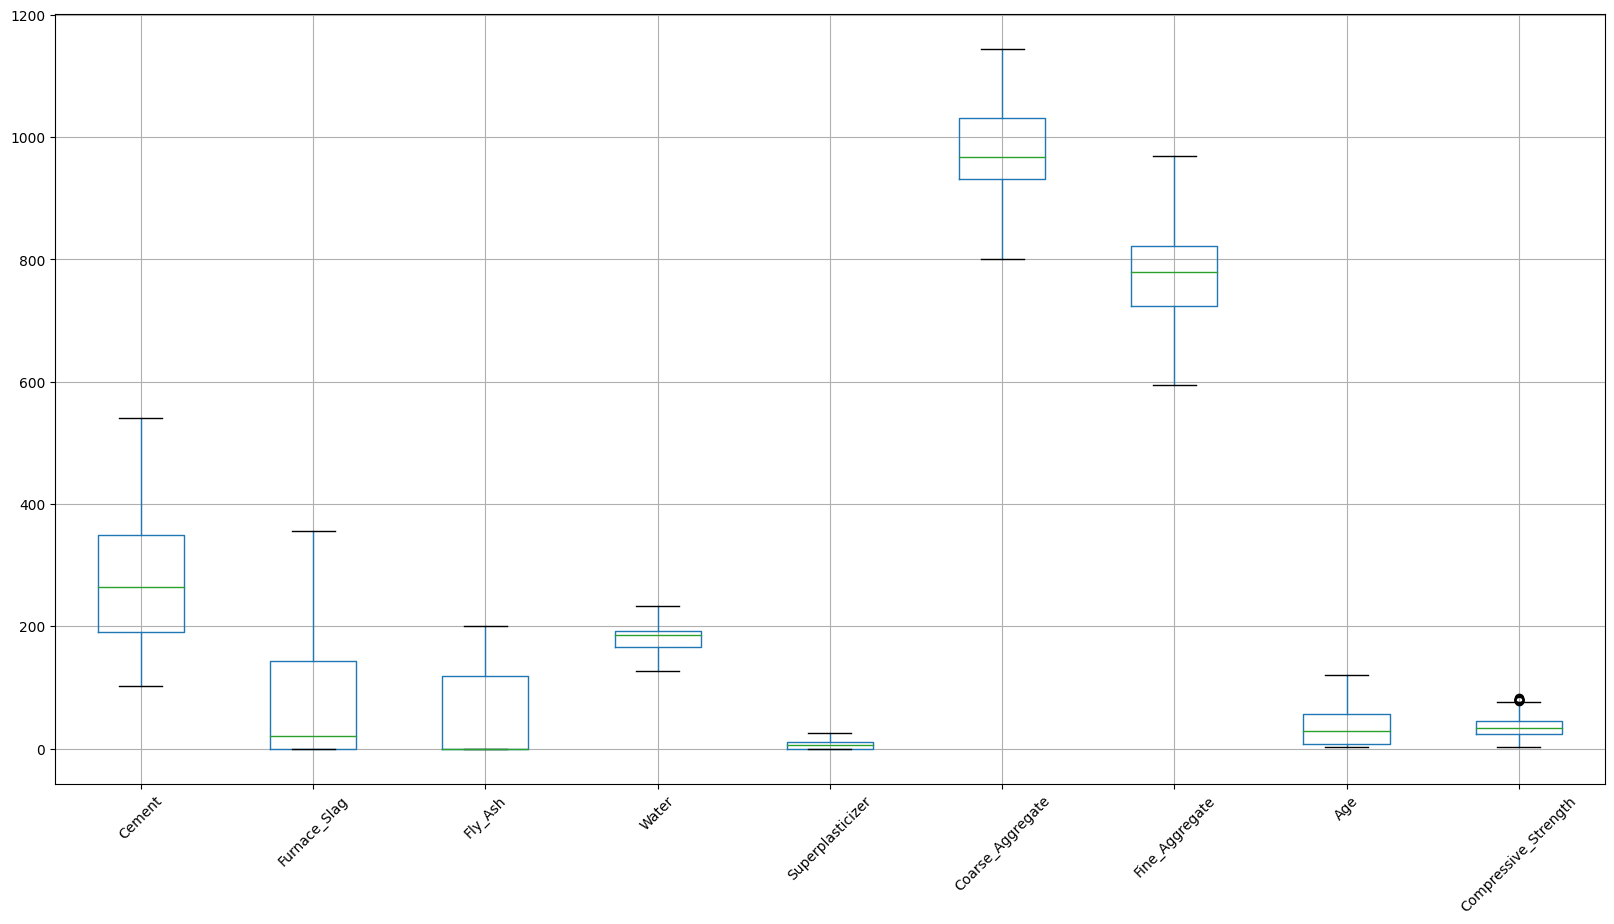

In [61]:
df.boxplot(column = ['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate',
 'Fine_Aggregate', 'Age', 'Compressive_Strength'], rot=45, figsize = (20,10));

In [62]:
df.to_csv('Data/Concrete_without_Outliers.csv', index=False)

# Next:

Variable Transformation is performed in **01_Concrete_Variable_Transformation.ipynb**